### EVASIVE PDFs ###


![Evasive PDFs](mallicious_pdf.jpg)

***Introduction***

**Dataset**

The dataset, freely online available at [Kaggle](https://www.kaggle.com/datasets/fouadtrad2/evasive-pdf-samples), is composed from 500.000 generated PDFs samples, 450.000 of which are malicious and 50.000 are not malicious (benign). The dataset contains initially 21 columns with information about the PDFs, like their size, the number of pages, images, etc, and the last column is the label, with 1 for malicious and 0 for benign PDFs. 

**The problem**

With this project we aime to build a model that can predict if a PDF is malicious or not. 

**The approach**

We used a supervised learning model, using the dataset. However, given the dimension of the dataset, we are able to use two different datasets, one for training and one for testing. Before using the dataset, we needed to clean the dataset, by removing the columns where every value was the same, not adding any information to the model. We also removed the rows where the the number of pages or the size was zero, as they were not valid PDFs. We decided to leave the outsiders.

We tried three different approaches:

* We tried to train the model with outliers and 50-50 in test and train set 

* We removed the outliers and and give the model a 50-50 test and train set

* Finally we used the original dataset (with outliers) and tried to give the model different proportions of benign and malign in both train and test


**Dataset Information**

<!-- information table -->
| Column Name | Description |
| --- | --- |
|pdfsize | Size of the PDF file in Megabytes |
|pages | Number of pages in the PDF file |
|title charachters | Number of characters in the title of the PDF file |
|images | Number of images in the PDF file |
| obj | The number of keywords /obj |
| endobj | The number of keywords /endobj |
| stream | The number of keywords /stream |
| endstream | The number of keywords /endstream |
| xref | The number of xref tables |
| trailer | The number of keyword /trailer |
| startxref | The number of keyword /startxref |
| ObjStm | The number of keyword /ObjStm |
| JS | The number of keyword /JS |
| OBS_JS | The number of keyword /JavaScript(obfuscated) |
| JavaScript | The number of keyword /JavaScript |
| OpenAction | The number of keyword /OpenAction |
| OBS_OpenAction | The number of keyword /OpenAction(obfuscated) |
| Acroform | The number of keyword /AcroForm |
| OBS_AcroForm | The number of keyword /AcroForm(obfuscated) |
| class | 1 for malicious and 0 for benign PDFs |

----------------------------------------------------------------------------------------------------------------------------------

**Imports**

Importing the necessary libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import preprocessing
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay,recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from scipy import stats
from sklearn.ensemble import BaggingClassifier




Read the dataset and print the first 5 rows.

In [3]:
df = pd.read_csv('dataset/Evasive-PDF-Samples.csv') #read the csv

df.head()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,644.326,70,0,1,348,351,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,648.050,68,0,1,348,345,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,696.506,68,0,1,353,353,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1
3,715.926,68,0,0,759,667,250,192,1,1,...,0,1,0,1,0,1,0,1,0,1
4,707.102,70,10,2,388,373,141,138,1,1,...,0,1,0,1,0,1,0,1,0,1


**Data Analysis**

This prints the information and statistics about all columns and rows in the dataset, to get a better understanding of the data.

In [29]:
df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,startxref,ObjStm,JS,Javascript,OpenAction,Acroform,class
count,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000
mean,585.389753,57.984517,5.617550,1.082230,284.742459,284.628366,99.254753,99.472893,0.984164,1.007376,1.002006,0.003147,0.908654,0.832779,0.459072,0.918306,0.897798
std,263.722887,28.167737,6.526546,0.721058,134.869220,135.135304,49.096294,49.446580,0.233387,0.216247,0.181328,0.119542,0.520747,0.388655,0.498323,0.498751,0.302913
min,0.003000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,613.053000,68.000000,0.000000,1.000000,297.000000,297.000000,102.000000,103.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,661.081500,68.000000,4.000000,1.000000,347.000000,346.000000,124.000000,123.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,709.646000,69.000000,9.000000,2.000000,355.000000,355.000000,126.000000,126.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,4.000000,15.000000,3.000000,5.000000,1.000000,2.000000,1.000000


**Cleaning the dataset**

At this point we saw that cleaning the dataset was something needed to be done. We started by removing the columns that did not add any information as they were always zero.

In [4]:
columns_max_min_zero = [col for col in df.columns if df[col].max() == df[col].min()] #get the columns where max and min are 0

print(columns_max_min_zero) # print the name of the columns

if (columns_max_min_zero):
    df.drop(columns=columns_max_min_zero, inplace=True) #remove the columns from the dataset



['OBS_JS', 'OBS_Javascript', 'OBS_OpenAction', 'OBS_Acroform']


**Another look at the data**

After removing the columns we took another look at the data to see if there was anything else that needed to be done.

In [5]:
df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,startxref,ObjStm,JS,Javascript,OpenAction,Acroform,class
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0
mean,563.363772,55.101686,5.617004,1.041594,273.595072,273.472290,95.115512,95.331500,0.969714,1.001358,0.997758,0.008572,0.873134,0.795662,0.436600,0.887564,0.9
std,280.213763,30.233062,6.501397,0.734654,142.333280,142.734185,51.683914,52.094421,0.263349,0.244811,0.198658,0.198168,0.547981,0.416932,0.495965,0.519314,0.3
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,585.864250,67.000000,0.000000,1.000000,266.000000,266.000000,85.000000,87.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.0
50%,657.841000,68.000000,4.000000,1.000000,346.000000,345.000000,123.000000,122.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.0
75%,708.503250,69.000000,9.000000,2.000000,355.000000,354.000000,126.000000,126.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,4.000000,15.000000,3.000000,5.000000,1.000000,2.000000,1.0


At this point we realized that there were rows with values zero where it did not make sense, like the number of pages, or its size. So we removed the rows where the values didn't make sense.

In [5]:
nonsenses = (df['pdfsize'] == 0) | (df['pages'] == 0) # get the rows where pages is zero or pdfsize is zero

print('Number of rows removed:', nonsenses.sum())

df = df.drop(df[nonsenses].index) # remove those rows from the dataset



Number of rows removed: 25878


In [13]:
df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,startxref,ObjStm,JS,Javascript,OpenAction,Acroform,class
count,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000,474122.000000
mean,585.389753,57.984517,5.617550,1.082230,284.742459,284.628366,99.254753,99.472893,0.984164,1.007376,1.002006,0.003147,0.908654,0.832779,0.459072,0.918306,0.897798
std,263.722887,28.167737,6.526546,0.721058,134.869220,135.135304,49.096294,49.446580,0.233387,0.216247,0.181328,0.119542,0.520747,0.388655,0.498323,0.498751,0.302913
min,0.003000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,613.053000,68.000000,0.000000,1.000000,297.000000,297.000000,102.000000,103.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,661.081500,68.000000,4.000000,1.000000,347.000000,346.000000,124.000000,123.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,709.646000,69.000000,9.000000,2.000000,355.000000,355.000000,126.000000,126.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,4.000000,15.000000,3.000000,5.000000,1.000000,2.000000,1.000000


After cleaning the dataset we now checked if there were any missing values in the dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474122 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pdfsize           474122 non-null  float64
 1   pages             474122 non-null  int64  
 2   title characters  474122 non-null  int64  
 3   images            474122 non-null  int64  
 4   obj               474122 non-null  int64  
 5   endobj            474122 non-null  int64  
 6   stream            474122 non-null  int64  
 7   endstream         474122 non-null  int64  
 8   xref              474122 non-null  int64  
 9   trailer           474122 non-null  int64  
 10  startxref         474122 non-null  int64  
 11  ObjStm            474122 non-null  int64  
 12  JS                474122 non-null  int64  
 13  Javascript        474122 non-null  int64  
 14  OpenAction        474122 non-null  int64  
 15  Acroform          474122 non-null  int64  
 16  class             474122 

As we can see there are no missing values in the dataset, and all the columns are numerical, so there is no need to encode any categorical data or to clean more data.

Now that the dataset was clean and we were sure that we did not have any missing values, we checked if every columns were numeric, otherways we would need to convert them. Also the target class was numeric, so there was no need to encode it.

**Graphical analysis**

As we confirmed that all our columns inly have numeric values and that the data was properly cleaned, we could now starting to take another look at the data, now in a more graphica way.

So we ploted the data to check the distribution of the data based on the their classification.

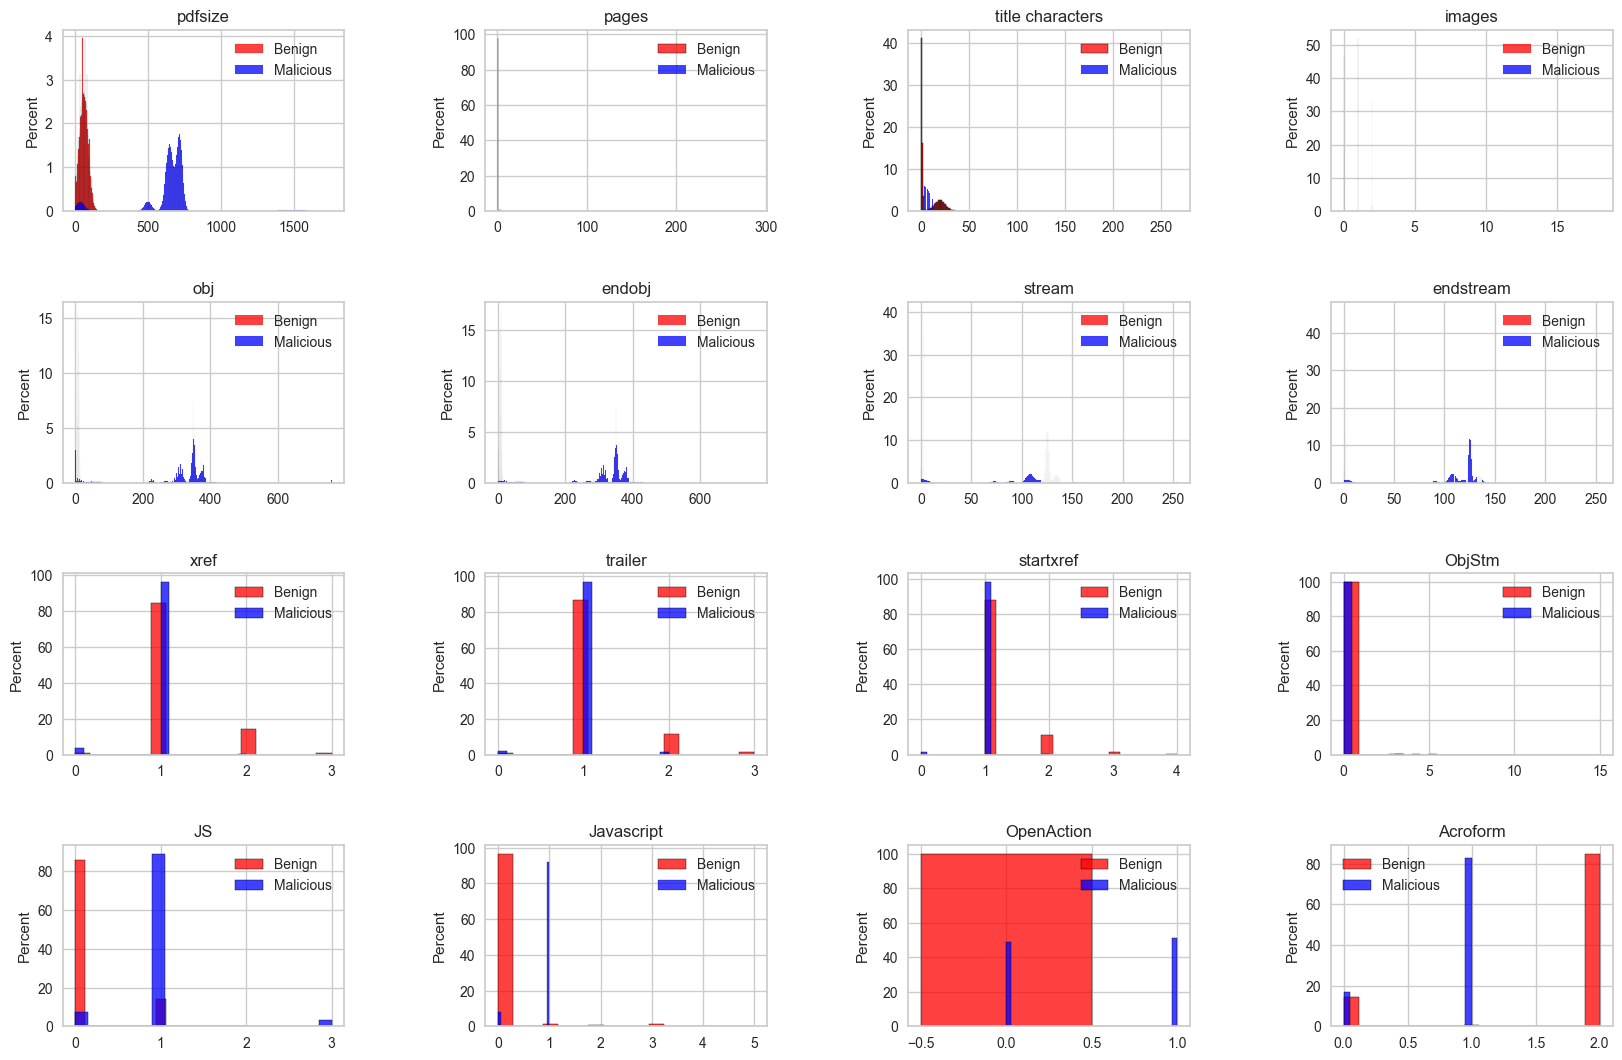

In [7]:
plt.figure(figsize=(20, 20))  # create a figure for all plots
plt.subplots_adjust(hspace=0.5, wspace=0.5) 

df0 = df[df['class'] == 0].drop('class', axis=1) #get the benign samples
df1 = df[df['class'] == 1].drop('class', axis=1) #get the malicious samples

cols = list(df0.columns) #get the columns

for i, col in enumerate(cols): #iterate over the columns
    plt.subplot(6, 4, i+1)  # create a subplot  
    sb.histplot(data=df0[col], color='red', label='Benign', stat='percent', element='bars') #plot the benign samples
    sb.histplot(data=df1[col], color='blue', label='Malicious', stat='percent', element='bars') #plot the malicious samples
    plt.title(col) #set the title
    plt.xlabel('') #set the x label
    _, axes = plt.gca().get_legend_handles_labels() #get the legend
    plt.legend(axes, prop={'size': 10}) #set the legend
 
plt.show() #show the plots



**Correlation Matrix**

We then created a plot for the correlation matrix, to check the correlation between the features.

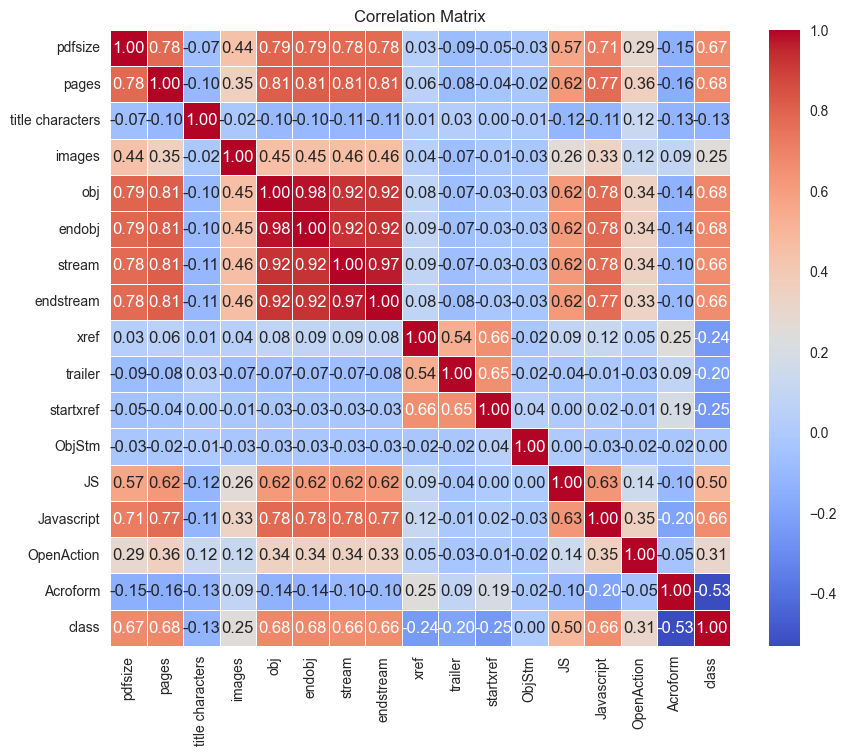

In [31]:
correlation_matrix = df.corr() #get the correlation matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In order to get a more objective visualization we created a heatmap of the correlation matrix, between the classification label and all of the other values.

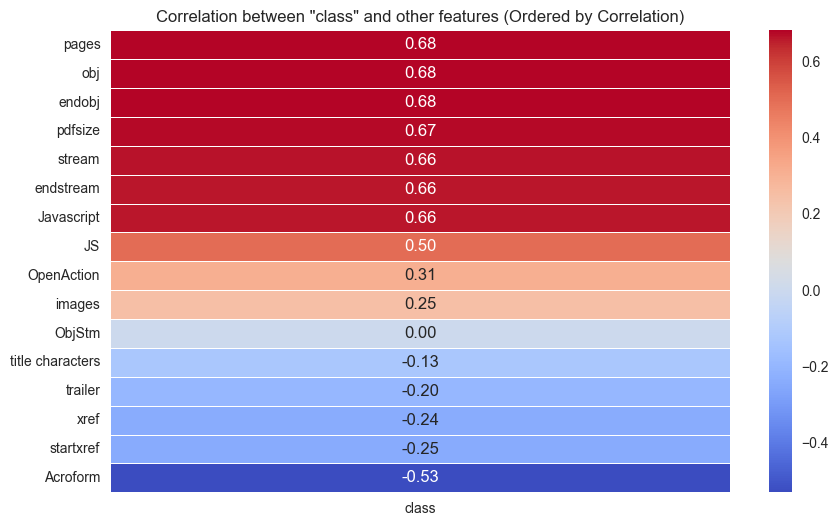

In [37]:
class_correlations = correlation_matrix['class'].drop('class')  # Drop the correlation with itself

class_correlations_sorted = class_correlations.sort_values(ascending=False) # Sort the correlations in descending order

# Extract the features in the sorted order
sorted_features = class_correlations_sorted.index

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(class_correlations[sorted_features].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between "class" and other features (Ordered by Correlation)')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------

**First Approach**

In the first approach we decided to train and test the model with a distribution of 50-50. 

**Prepare the data for Model Training**

As our dataset was big and had a lot of data, we first reduced our data so that our algorithms could handle the data. On top of that, our data was unbalanced, so we created a new smaller and balanced dataset to train our model.

In order to train the model we need to split the data into training and testing data. We used the train_test_split function from the sklearn library to split the data into training and testing data.

In [7]:
malicious_df = df[df['class'] == 1] #get the malicious samples
benign_df = df[df['class'] == 0] #get the benign samples

# Now, sample 40,000 instances from each without replacement
malicious_sample = malicious_df.sample(n=40000, random_state=1) # get 40,000 malicious samples

benign_sample = benign_df.sample(n=40000, random_state=1) # get 40,000 benign samples

# Combine the samples to create balanced dataset
balanced_sample = pd.concat([malicious_sample, benign_sample])
columns_for_clustering = balanced_sample.drop(['class'],axis=1)

# Split the data into training and test sets
X_train, X_test_0, y_train, y_test_0 = train_test_split(columns_for_clustering, balanced_sample['class'], test_size=0.15, random_state=42)

print("Size of X train : " + str(X_train.shape[0]))

print("Size of X test : " + str(X_test_0.shape[0]))



Size of X train : 68000
Size of X test : 12000


**Model training**

We started by running the models with the default parameters, to get a baseline, and then plotting the results.

In [49]:
classification = setup(data = balanced_sample, train_size=0.9, target = 'class', session_id=42, normalize=True, transformation=True)

best = compare_models() #compare the models

results = pull() 
results

,Description,Value
0,Session id,42
1,Target,class
2,Target type,Binary
3,Original data shape,"(80000, 17)"
4,Transformed data shape,"(80000, 17)"
5,Transformed train set shape,"(72000, 17)"
6,Transformed test set shape,"(8000, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9991,1.0000,0.9988,0.9994,0.9991,0.9981,0.9981,0.6040
lightgbm,Light Gradient Boosting Machine,0.9991,1.0000,0.9988,0.9994,0.9991,0.9982,0.9982,0.7180
catboost,CatBoost Classifier,0.9990,1.0000,0.9986,0.9993,0.9990,0.9980,0.9980,8.3940
rf,Random Forest Classifier,0.9989,1.0000,0.9983,0.9995,0.9989,0.9978,0.9978,1.4210
et,Extra Trees Classifier,0.9989,1.0000,0.9985,0.9994,0.9989,0.9979,0.9979,1.0130
ada,Ada Boost Classifier,0.9987,1.0000,0.9984,0.9989,0.9987,0.9973,0.9973,1.0870
gbc,Gradient Boosting Classifier,0.9983,1.0000,0.9977,0.9989,0.9983,0.9966,0.9966,2.4400
dt,Decision Tree Classifier,0.9973,0.9973,0.9970,0.9976,0.9973,0.9947,0.9947,0.5690
knn,K Neighbors Classifier,0.9958,0.9990,0.9935,0.9980,0.9958,0.9916,0.9916,1.3340
svm,SVM - Linear Kernel,0.9892,0.9982,0.9858,0.9926,0.9892,0.9785,0.9785,0.5280


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9991,1.0000,0.9988,0.9994,0.9991,0.9981,0.9981,0.604
lightgbm,Light Gradient Boosting Machine,0.9991,1.0000,0.9988,0.9994,0.9991,0.9982,0.9982,0.718
catboost,CatBoost Classifier,0.9990,1.0000,0.9986,0.9993,0.9990,0.9980,0.9980,8.394
rf,Random Forest Classifier,0.9989,1.0000,0.9983,0.9995,0.9989,0.9978,0.9978,1.421
et,Extra Trees Classifier,0.9989,1.0000,0.9985,0.9994,0.9989,0.9979,0.9979,1.013
ada,Ada Boost Classifier,0.9987,1.0000,0.9984,0.9989,0.9987,0.9973,0.9973,1.087
gbc,Gradient Boosting Classifier,0.9983,1.0000,0.9977,0.9989,0.9983,0.9966,0.9966,2.440
dt,Decision Tree Classifier,0.9973,0.9973,0.9970,0.9976,0.9973,0.9947,0.9947,0.569
knn,K Neighbors Classifier,0.9958,0.9990,0.9935,0.9980,0.9958,0.9916,0.9916,1.334
svm,SVM - Linear Kernel,0.9892,0.9982,0.9858,0.9926,0.9892,0.9785,0.9785,0.528


After running the default parameters, we decided to try some more algorithms, and for that we had to use an external library, since PyCaret does not offer support for these algorithms.

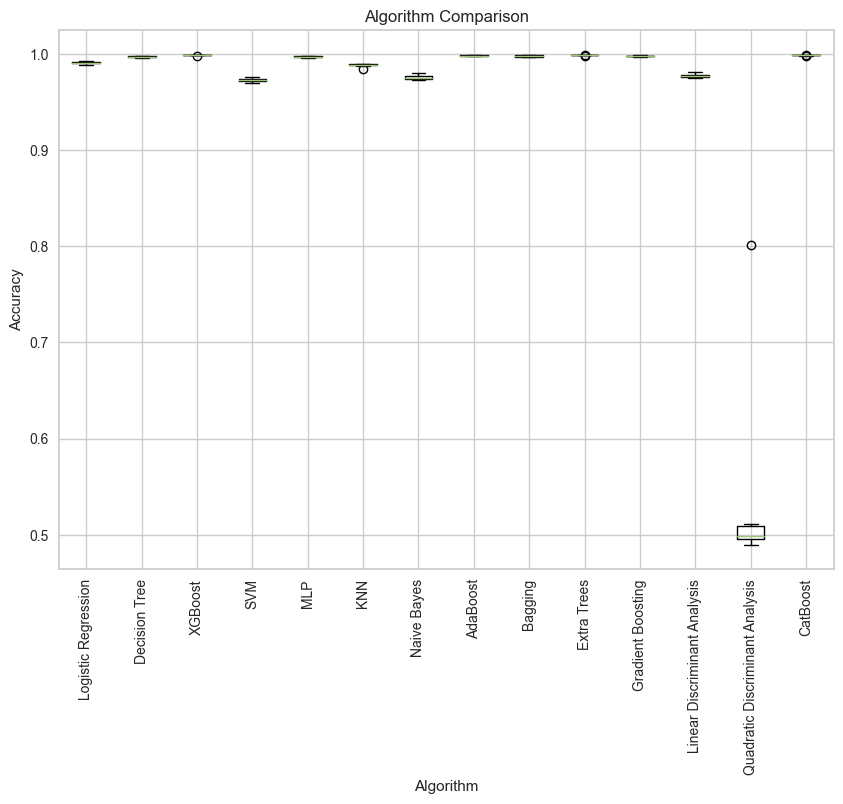

In [50]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees', ExtraTreesClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()))
models.append(('CatBoost', CatBoostClassifier(logging_level='Silent')))

results = []
names = []
scoring = 'accuracy'

for name, model in models: #iterate over every model
    kfold = KFold(n_splits=10, random_state=42, shuffle=True) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
plt.figure(figsize=(10,7)) #create a figure for plots
plt.boxplot(results, labels=names) 
plt.title('Algorithm Comparison')

# swap the axes
plt.xlabel('Algorithm') 
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

plt.show()


**Select the best choices**

After analyzing the data we picked the algorithms that scored the best results and trained the model with our data. After that we plotted the confusion matrix, so we get a visual representation of the performance of the model.

The first model that presented a good result was the *Extreme Gradient Boosting*.

In [8]:
choosen = XGBClassifier(random_state = 42) #choose the model

choosen.fit(X_train, y_train) #fit the model

choosen.score(X_train, y_train) #get the score of the model

1.0

In [9]:
choosen.score(X_test_0, y_test_0) #get the test score of the model

0.99925

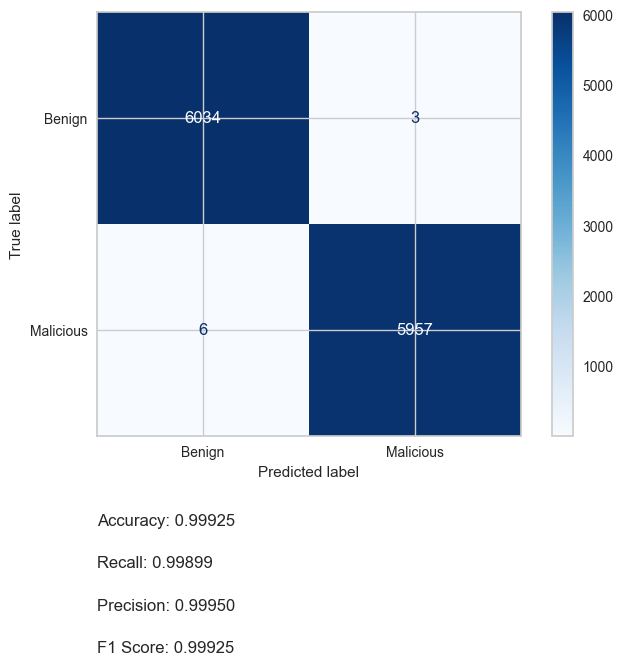

In [10]:
y_pred = choosen.predict(X_test_0) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_0, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_0, y_pred)
recall = recall_score(y_test_0, y_pred, pos_label=1)  
precision = precision_score(y_test_0, y_pred, pos_label=1)
f1 = f1_score(y_test_0, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

The next model that presented a good result was the *Light Gradient Boosting*.

In [11]:
choosen2 = LGBMClassifier(**{'verbosity' : -1},  random_state = 42) 

choosen2.fit(X_train, y_train) 

choosen2.score(X_train, y_train)

1.0

In [12]:
choosen2.score(X_test_0, y_test_0)

0.9993333333333333

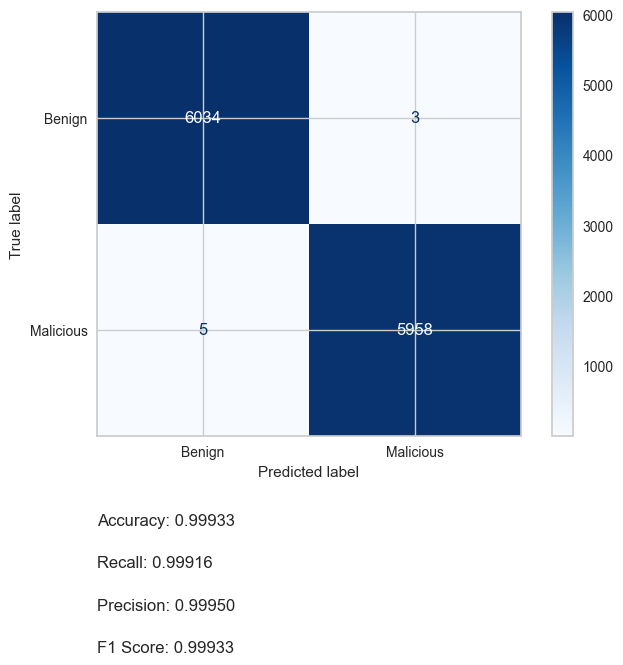

In [13]:
y_pred = choosen2.predict(X_test_0) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_0, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_0, y_pred)
recall = recall_score(y_test_0, y_pred, pos_label=1) 
precision = precision_score(y_test_0, y_pred, pos_label=1)
f1 = f1_score(y_test_0, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

We can see that *AdaBoost* also presented a good result, so we decided to train the model with this algorithm and have another loom at the results from that model.

In [14]:
choosen3 = AdaBoostClassifier(random_state=42)

choosen3.fit(X_train, y_train)

choosen3.score(X_train, y_train)

0.9987941176470588

In [15]:
choosen3.score(X_test_0, y_test_0)

0.9989166666666667

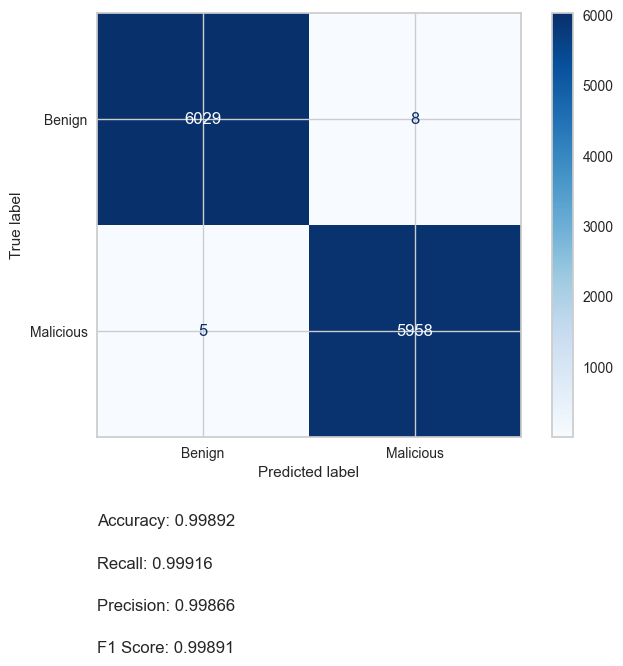

In [16]:
y_pred = choosen3.predict(X_test_0) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_0, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_0, y_pred)
recall = recall_score(y_test_0, y_pred, pos_label=1) 
precision = precision_score(y_test_0, y_pred, pos_label=1)
f1 = f1_score(y_test_0, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

The final model with a good result was the *Extra Trees*.

In [17]:
choosen4 = ExtraTreesClassifier(random_state=42)

choosen4.fit(X_train, y_train)

choosen4.score(X_train, y_train)

1.0

In [18]:
choosen4.score(X_test_0, y_test_0)

0.999

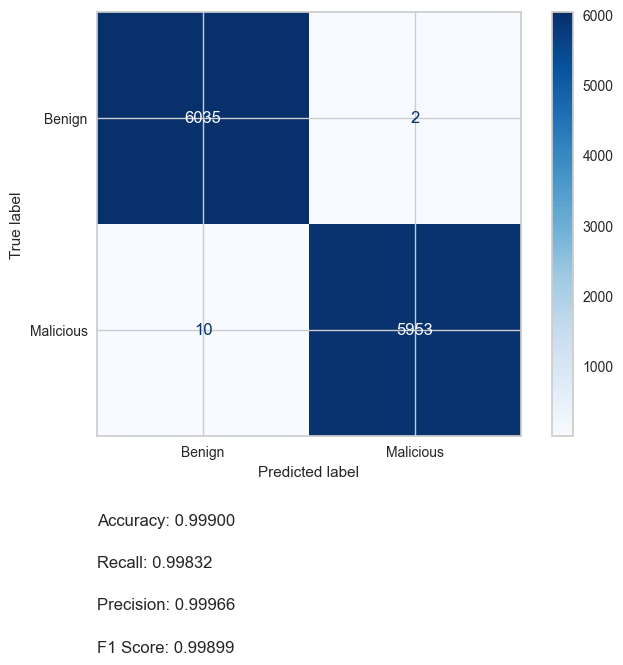

In [19]:
y_pred = choosen4.predict(X_test_0) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_0, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_0, y_pred)
recall = recall_score(y_test_0, y_pred, pos_label=1) 
precision = precision_score(y_test_0, y_pred, pos_label=1)
f1 = f1_score(y_test_0, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

----------------------------------------------------------------------------------------------------------------------------------

**Second Approach**

After presenting the first results we decided to try one more approach on the data. This time we decided to clean the outliers and test the same models to check if the results were different.

First we are plotting the data to check the distribution of the data based on the their classification and the outliers.

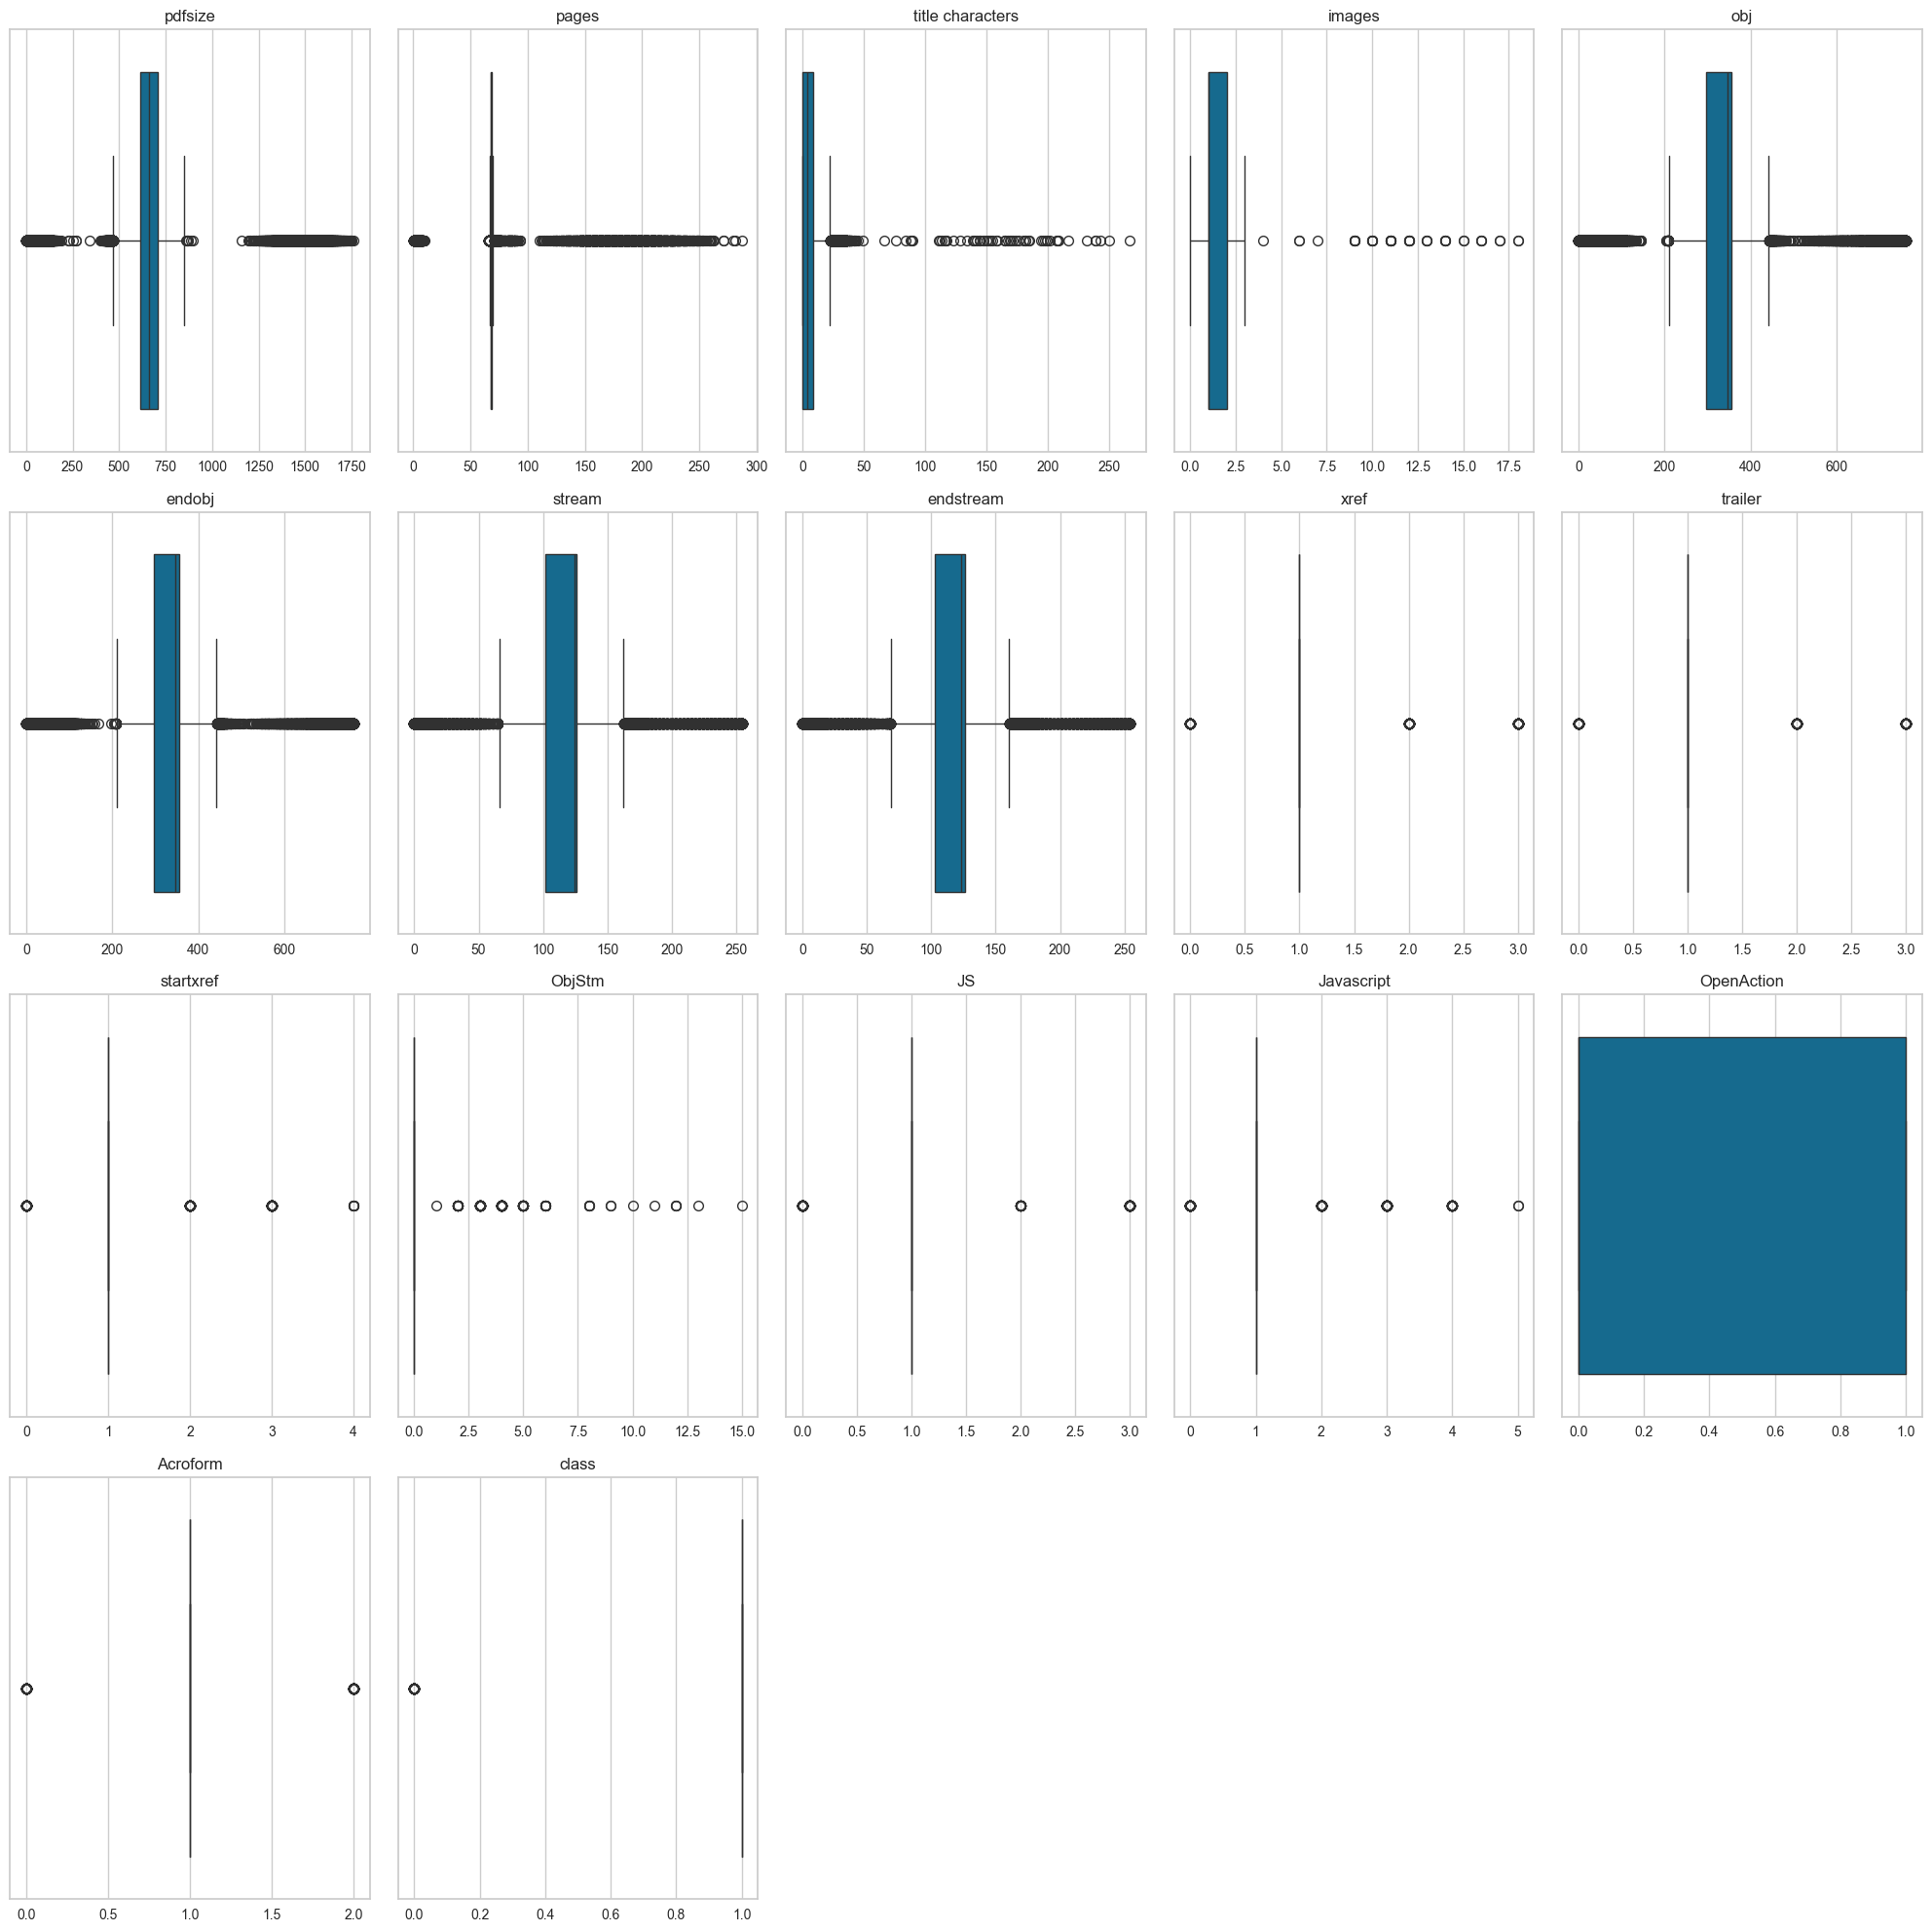

In [18]:
nrows = 4
ncols = 5

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axs = axs.flatten()
attributes = df.columns
for i, attribute in enumerate(attributes):
    sb.boxplot(x=df[attribute], ax=axs[i])
    axs[i].set_title(attribute)
    axs[i].set_xlabel('')

# Turn off the remaining empty axes
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

First we removed the outliers from the dataset, using the Z-score method.

In [22]:
from scipy.stats import zscore

def remove_outliers_zscore(df, threshold=3):
    z_scores = df.apply(zscore)
    return df[(z_scores < threshold).all(axis=1)]

cleaned_df = remove_outliers_zscore(df)

rows_removed = df.shape[0] - cleaned_df.shape[0]
print(f'Number of rows removed: {rows_removed}')

Number of rows removed: 43864


After applying the method we checked the shape of the dataset to see how many rows were removed.

In [9]:
cleaned_df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,startxref,ObjStm,JS,Javascript,OpenAction,Acroform,class
count,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000,430258.0,430258.000000,430258.000000,430258.000000,430258.000000,430258.000000
mean,582.982907,58.519351,5.260002,1.092786,287.511777,287.245550,100.454395,100.555839,0.971368,0.980935,0.985574,0.0,0.863770,0.847747,0.491145,0.927206,0.912473
std,221.178457,24.244666,5.726120,0.698660,124.616358,124.877131,45.926688,45.885295,0.166769,0.136755,0.119240,0.0,0.343033,0.359266,0.499922,0.472993,0.282605
min,0.003000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,618.450250,68.000000,0.000000,1.000000,302.000000,302.000000,105.000000,105.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
50%,660.173500,68.000000,4.000000,1.000000,347.000000,346.000000,124.000000,123.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
75%,707.327000,69.000000,9.000000,2.000000,354.000000,354.000000,126.000000,126.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
max,1376.556000,142.000000,25.000000,3.000000,689.000000,690.000000,246.000000,247.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000


**Prepare for the Model Training**

As effectively there were samples removed and the data was now distributed in a more approximate way, we decided to once more prepare the data to train the models. 

In [27]:
malicious_cleaned = cleaned_df[cleaned_df['class'] == 1] #get the malicious samples
benign_cleaned = cleaned_df[cleaned_df['class'] == 0] #get the benign samples

minimum = min(malicious_cleaned.shape[0], benign_cleaned.shape[0]) # get the number minimum of samples

mal_clean_sample = malicious_cleaned.sample(n=minimum, random_state=1) # get the malicious samples
ben_clean_sample = benign_cleaned.sample(n=minimum, random_state=1) # get the benign samples

print("Malicious samples: ", mal_clean_sample.shape[0]) # check the number of samples 
print("Benign samples: ", ben_clean_sample.shape[0]) # check if the number of samples is the same in both classes

final_balanced = pd.concat([mal_clean_sample, ben_clean_sample])
columns_for_clustering = final_balanced.drop(['class'],axis=1)

X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(columns_for_clustering, final_balanced['class'], test_size=0.15, random_state=42)

print("Size of X train : " + str(X_train_out.shape[0]))

print("Size of X test : " + str(X_test_out.shape[0]))

Malicious samples:  37659
Benign samples:  37659
Size of X train : 64020
Size of X test : 11298


**Model Training**

Now that we have cleaned the data we can train the models again and observe the results.

Starting by the *XGBoost model*.

In [28]:
choosen_out = XGBClassifier(random_state = 42) #choose the model

choosen_out.fit(X_train_out, y_train_out) #fit the model

choosen_out.score(X_train_out, y_train_out) 

1.0

In [29]:
choosen_out.score(X_test_out, y_test_out) #get the test score of the model

0.9993804213135068

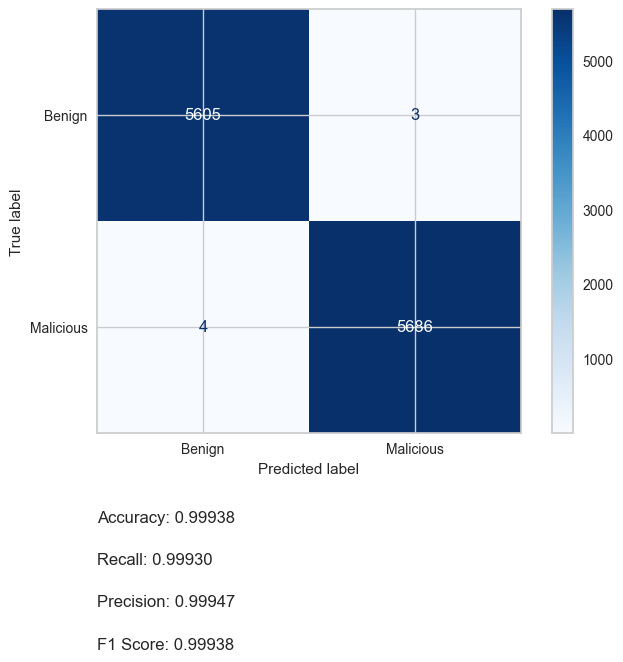

In [30]:
y_pred = choosen_out.predict(X_test_out) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_out, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_out, y_pred)
recall = recall_score(y_test_out, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_out, y_pred, pos_label=1)
f1 = f1_score(y_test_out, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Light Gradient Boosting*.

In [31]:
choosen2_out = LGBMClassifier(**{'verbosity' : -1},  random_state = 42) 

choosen2_out.fit(X_train_out, y_train_out) 

choosen2_out.score(X_train_out, y_train_out) 

1.0

In [32]:
choosen2_out.score(X_test_out, y_test_out)

0.9992033988316517

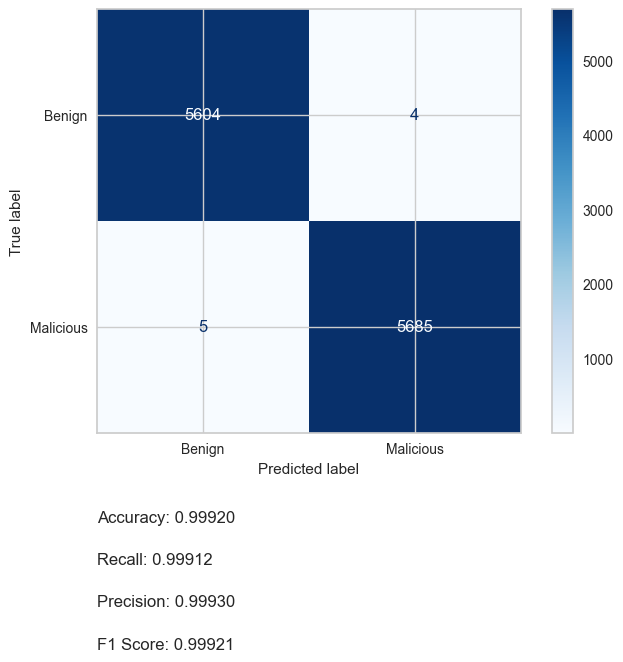

In [33]:
y_pred = choosen2_out.predict(X_test_out) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_out, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_out, y_pred)
recall = recall_score(y_test_out, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_out, y_pred, pos_label=1)
f1 = f1_score(y_test_out, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*AdaBoost model*.

In [34]:
choosen3_out = AdaBoostClassifier(random_state=42)

choosen3_out.fit(X_train_out, y_train_out)

choosen3_out.score(X_train_out, y_train_out)

0.9989534520462355

In [35]:
choosen3_out.score(X_test_out, y_test_out)

0.9992033988316517

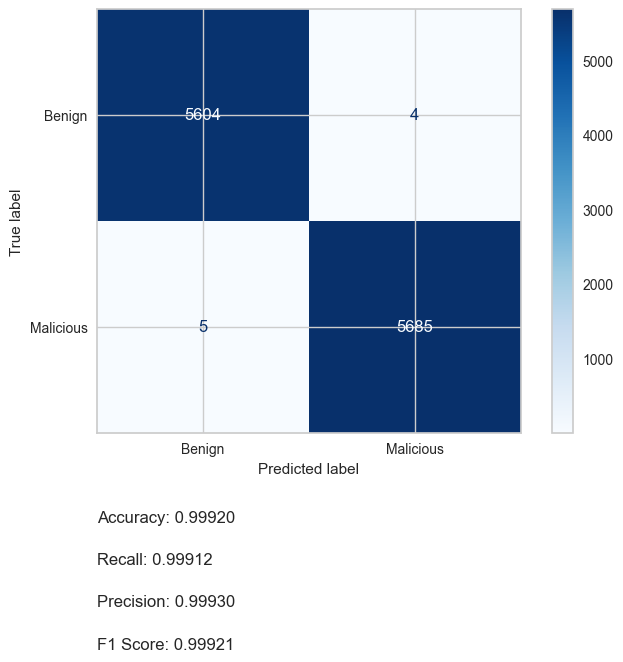

In [36]:
y_pred = choosen3_out.predict(X_test_out) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_out, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_out, y_pred)
recall = recall_score(y_test_out, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_out, y_pred, pos_label=1)
f1 = f1_score(y_test_out, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Extra Trees Classifier*

In [37]:
choosen4_out = ExtraTreesClassifier(random_state=42)

choosen4_out.fit(X_train_out, y_train_out)

choosen4_out.score(X_train_out, y_train_out)

1.0

In [38]:
choosen4_out.score(X_test_out, y_test_out)

0.9988493538679413

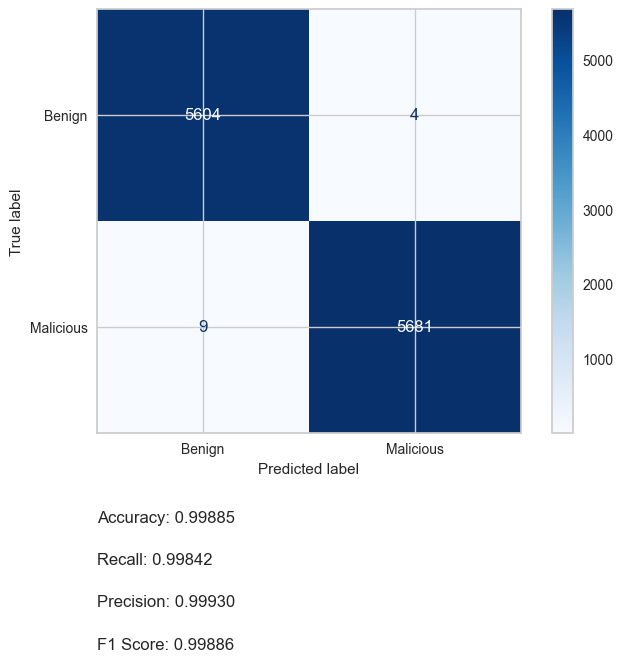

In [39]:
y_pred = choosen4_out.predict(X_test_out) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_out, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_out, y_pred)
recall = recall_score(y_test_out, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_out, y_pred, pos_label=1)
f1 = f1_score(y_test_out, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Results**

Watching the result of this approach we can see that no noticeable difference was made in the results.

----------------------------------------------------------------------------------------------------------------------------------

**Third Approach**

In this part of the project we decided to give different sizes of datasets to train the model and different sizes to test it.

* We will train with a distribuition of 50%-50% and test with 90%-10%.

* Then we will do the same with a train distribution of 90%-10% and 50%-50% to test.

* Finally we will train with 90%-10% and test with 90%-10%.

**Prepare for model training**

Starting by arranging the data to train and test.

In [40]:
malicious_df = df[df['class'] == 1] #get the malicious samples
benign_df = df[df['class'] == 0] #get the benign samples

total_malicious = len(malicious_df)
total_benign = len(benign_df)

print("Total Malicious: ", total_malicious)
print("Total Benign: ", total_benign)


#train 50-50
#test 90-10

#get 40.000 samples from each class
mal_train_sample = malicious_df.sample(n=40000, random_state=1)
ben_train_sample = benign_df.sample(n=40000, random_state=1)

mal_sample_2 = malicious_df.drop(mal_train_sample.index)
ben_sample_2 = benign_df.drop(ben_train_sample.index)


mal_test_sample = mal_sample_2.sample(n=45000, random_state=1)
ben_tes_sample = ben_sample_2.sample(n=5000, random_state=1)

total_sample = pd.concat([mal_train_sample, ben_train_sample, mal_test_sample, ben_tes_sample])

total_train = pd.concat([mal_train_sample, ben_train_sample])
total_test = pd.concat([mal_test_sample, ben_tes_sample])

X_train_1 = total_train.drop(['class'], axis=1)
y_train_1 = total_train['class']
X_test_1 = total_test.drop(['class'], axis=1)
y_test_1 = total_test['class']


print("Train Malicious: ", mal_train_sample.shape[0])
print("Train Benign: ", ben_train_sample.shape[0])
print("Test Malicious: ", mal_test_sample.shape[0])
print("Test Benign: ", ben_tes_sample.shape[0])



Total Malicious:  425666
Total Benign:  48456
Train Malicious:  40000
Train Benign:  40000
Test Malicious:  45000
Test Benign:  5000


**Model Training**

After preparing the data we can now train the models and check the results.

*XGBoost*.

In [84]:
choosen6 = XGBClassifier(random_state = 42) #choose the model

choosen6.fit(X_train_1, y_train_1) #fit the model

choosen6.score(X_train_1, y_train_1) #get the score of the model

1.0

In [85]:
choosen6.score(X_test_1, y_test_1) #get the test score of the model 

0.99886

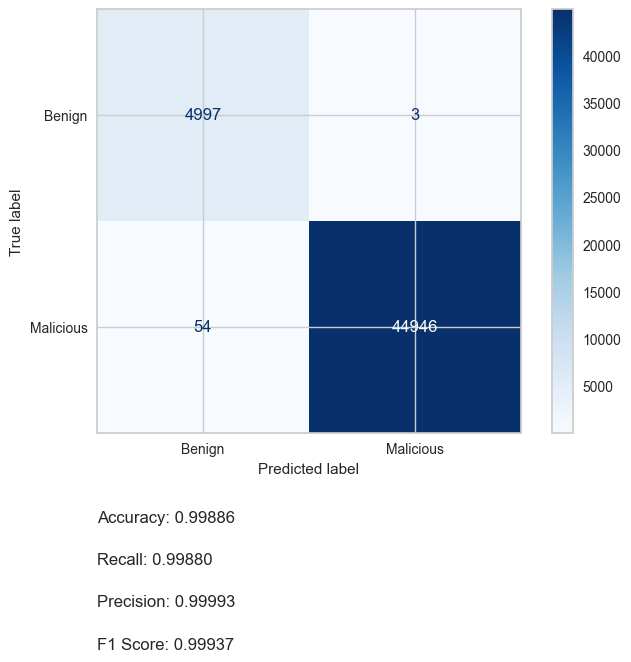

In [86]:
y_pred = choosen6.predict(X_test_1) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_1, y_pred, pos_label=1)
f1 = f1_score(y_test_1, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Light Gradient Boosting*.

In [44]:
choosen7 = LGBMClassifier(**{'verbosity' : -1},  random_state = 42) 

choosen7.fit(X_train_1, y_train_1) 

choosen7.score(X_train_1, y_train_1)

1.0

In [45]:
choosen7.score(X_test_1, y_test_1)

0.9989

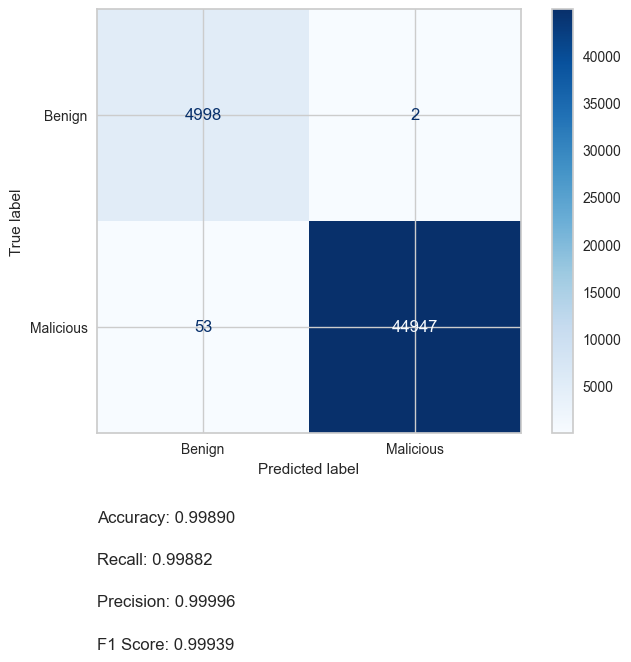

In [46]:
y_pred = choosen7.predict(X_test_1) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_1, y_pred, pos_label=1)
f1 = f1_score(y_test_1, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Ada Boost.*

In [47]:
choosen8 = AdaBoostClassifier(random_state=42)

choosen8.fit(X_train_1, y_train_1)

choosen8.score(X_train_1, y_train_1)

0.9987625

In [48]:
choosen8.score(X_test_1, y_test_1)

0.99838

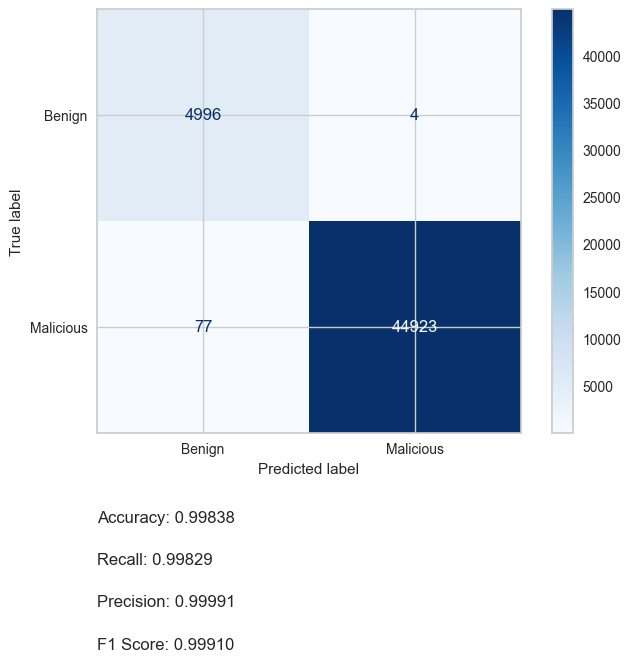

In [49]:
y_pred = choosen8.predict(X_test_1) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_1, y_pred, pos_label=1)
f1 = f1_score(y_test_1, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Extra trees classifier.*

In [50]:
choosen9 = ExtraTreesClassifier(random_state=42)

choosen9.fit(X_train_1, y_train_1)

choosen9.score(X_train_1, y_train_1)

1.0

In [51]:
choosen9.score(X_test_1, y_test_1)

0.99862

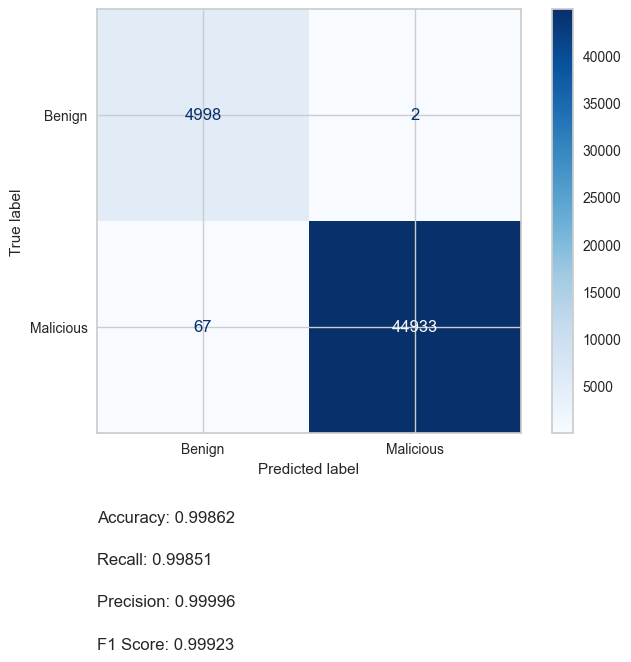

In [52]:
y_pred = choosen9.predict(X_test_1) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_1, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_1, y_pred)
recall = recall_score(y_test_1, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_1, y_pred, pos_label=1)
f1 = f1_score(y_test_1, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Prepare for model training**

Now we are going to arrange the data in order to have a train set with a 90%-10% distribution and a test set with a 50%-50% distribution.

In [22]:
malicious_df = df[df['class'] == 1] #get the malicious samples
benign_df = df[df['class'] == 0] #get the benign samples

total_malicious = len(malicious_df)
total_benign = len(benign_df)

print("Total Malicious: ", total_malicious)
print("Total Benign: ", total_benign)


#train 90-10
#test 50-50

#get 40.000 samples from each class
mal_train_sample = malicious_df.sample(n=360000, random_state=1)
ben_train_sample = benign_df.sample(n=40000, random_state=1)

mal_sample_2 = malicious_df.drop(mal_train_sample.index)
ben_sample_2 = benign_df.drop(ben_train_sample.index)


mal_test_sample = mal_sample_2.sample(n=7000, random_state=1)
ben_tes_sample = ben_sample_2.sample(n=7000, random_state=1)

total_sample = pd.concat([mal_train_sample, ben_train_sample, mal_test_sample, ben_tes_sample])

total_train = pd.concat([mal_train_sample, ben_train_sample])
total_test = pd.concat([mal_test_sample, ben_tes_sample])

X_train_2 = total_train.drop(['class'], axis=1)
y_train_2 = total_train['class']
X_test_2 = total_test.drop(['class'], axis=1)
y_test_2 = total_test['class']


print("Train Malicious: ", mal_train_sample.shape[0])
print("Train Benign: ", ben_train_sample.shape[0])
print("Test Malicious: ", mal_test_sample.shape[0])
print("Test Benign: ", ben_tes_sample.shape[0])



Total Malicious:  425666
Total Benign:  48456
Train Malicious:  360000
Train Benign:  40000
Test Malicious:  7000
Test Benign:  7000


**Model Training**

*XGBoost*  

In [54]:
choosen10 = XGBClassifier(random_state = 42) #choose the model

choosen10.fit(X_train_2, y_train_2) #fit the model

choosen10.score(X_train_2, y_train_2) #get the score of the model

0.9999375

In [55]:
choosen10.score(X_test_2, y_test_2) #get the test score of the model

0.9988571428571429

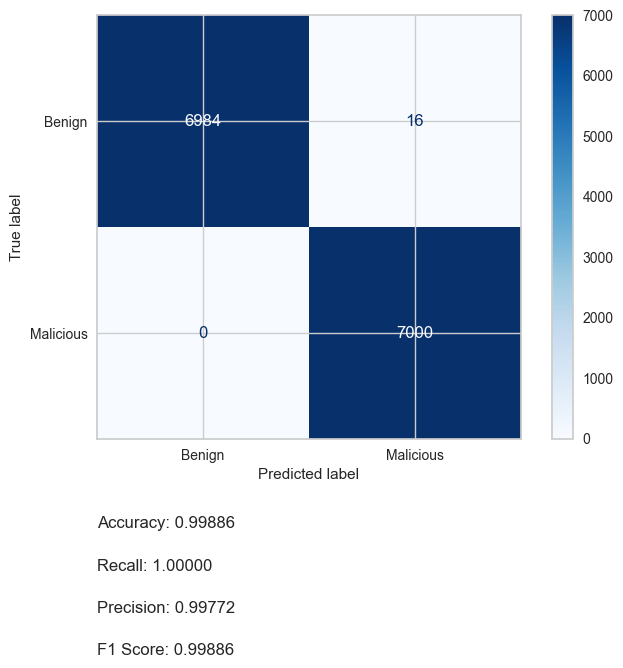

In [56]:
y_pred = choosen10.predict(X_test_2) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_2, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_2, y_pred, pos_label=1)
f1 = f1_score(y_test_2, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Light Gradient Boosting*

In [57]:
choosen11 = LGBMClassifier(**{'verbosity' : -1},  random_state = 42) 

choosen11.fit(X_train_2, y_train_2) 

choosen11.score(X_train_2, y_train_2)

0.999915

In [58]:
choosen11.score(X_test_2, y_test_2) #get the test score of the model

0.9989285714285714

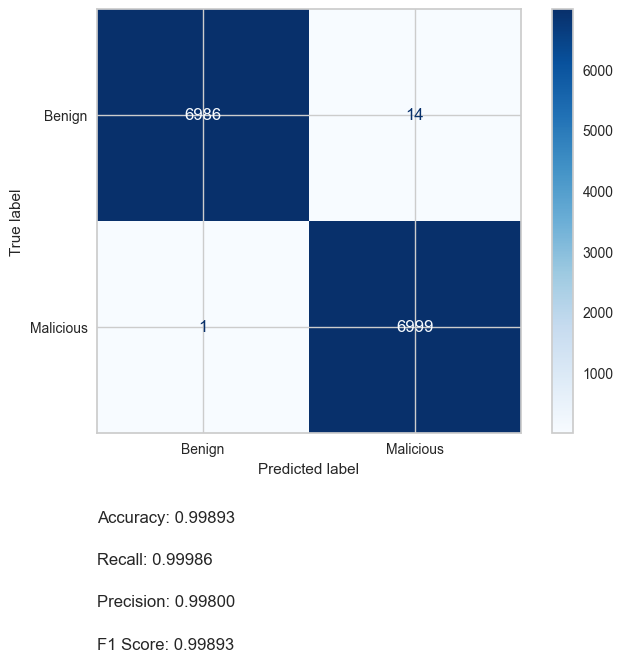

In [59]:
y_pred = choosen11.predict(X_test_2) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_2, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_2, y_pred, pos_label=1)
f1 = f1_score(y_test_2, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*AdaBoost*

In [60]:
choosen12 = AdaBoostClassifier(random_state=42)

choosen12.fit(X_train_2, y_train_2)

choosen12.score(X_train_2, y_train_2)

0.99928

In [61]:
choosen12.score(X_test_2, y_test_2) #get the test score of the model

0.9979285714285714

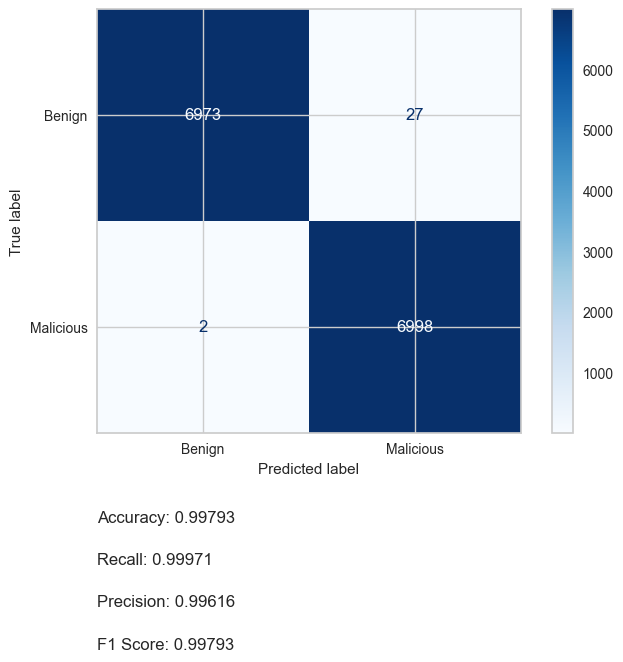

In [62]:
y_pred = choosen12.predict(X_test_2) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_2, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_2, y_pred, pos_label=1)
f1 = f1_score(y_test_2, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Extra Trees Classifier*

In [63]:
choosen13 = ExtraTreesClassifier(random_state=42)

choosen13.fit(X_train_2, y_train_2)

choosen13.score(X_train_2, y_train_2)

1.0

In [64]:
choosen13.score(X_test_2, y_test_2) #get the test score of the model

0.9986428571428572

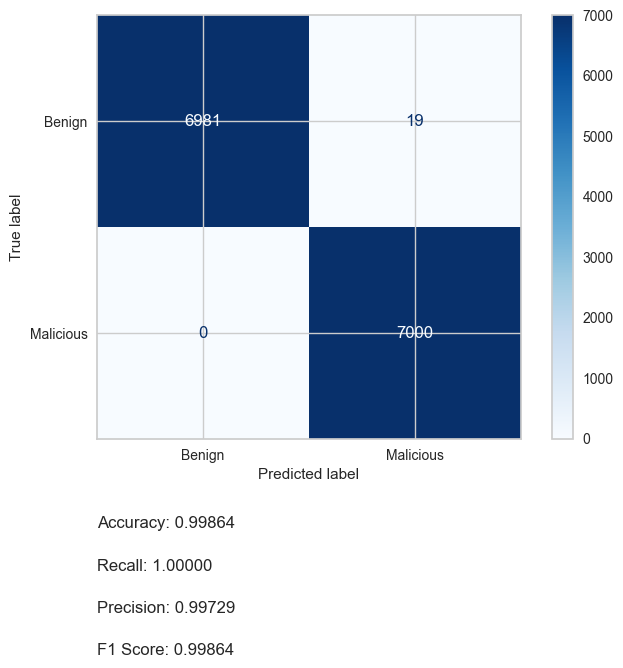

In [65]:
y_pred = choosen13.predict(X_test_2) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_2, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_2, y_pred)
recall = recall_score(y_test_2, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_2, y_pred, pos_label=1)
f1 = f1_score(y_test_2, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Prepare for model training**

Finally we are preparing the data to train with a 90%-10% distribution and test with the same distribution.

In [21]:
malicious_df = df[df['class'] == 1] #get the malicious samples
benign_df = df[df['class'] == 0] #get the benign samples

total_malicious = len(malicious_df)
total_benign = len(benign_df)

print("Total Malicious: ", total_malicious)
print("Total Benign: ", total_benign)


#train 90-10
#test 90-10

#get 40.000 samples from each class
mal_train_sample = malicious_df.sample(n=360000, random_state=1)
ben_train_sample = benign_df.sample(n=40000, random_state=1)

mal_sample_2 = malicious_df.drop(mal_train_sample.index)
ben_sample_2 = benign_df.drop(ben_train_sample.index)


mal_test_sample = mal_sample_2.sample(n=45000, random_state=1)
ben_tes_sample = ben_sample_2.sample(n=5000, random_state=1)

total_sample = pd.concat([mal_train_sample, ben_train_sample, mal_test_sample, ben_tes_sample])

total_train = pd.concat([mal_train_sample, ben_train_sample])
total_test = pd.concat([mal_test_sample, ben_tes_sample])

X_train_3 = total_train.drop(['class'], axis=1)
y_train_3 = total_train['class']
X_test_3 = total_test.drop(['class'], axis=1)
y_test_3 = total_test['class']


print("Train Malicious: ", mal_train_sample.shape[0])
print("Train Benign: ", ben_train_sample.shape[0])
print("Test Malicious: ", mal_test_sample.shape[0])
print("Test Benign: ", ben_tes_sample.shape[0])



Total Malicious:  425666
Total Benign:  48456
Train Malicious:  360000
Train Benign:  40000
Test Malicious:  45000
Test Benign:  5000


**Model Training**

*XGBoost*

In [67]:
choosen14 = XGBClassifier(random_state = 42) #choose the model

choosen14.fit(X_train_3, y_train_3) #fit the model

choosen14.score(X_train_3, y_train_3) #get the score of the model

0.9999375

In [68]:
choosen14.score(X_test_3, y_test_3) #get the test score of the model

0.99954

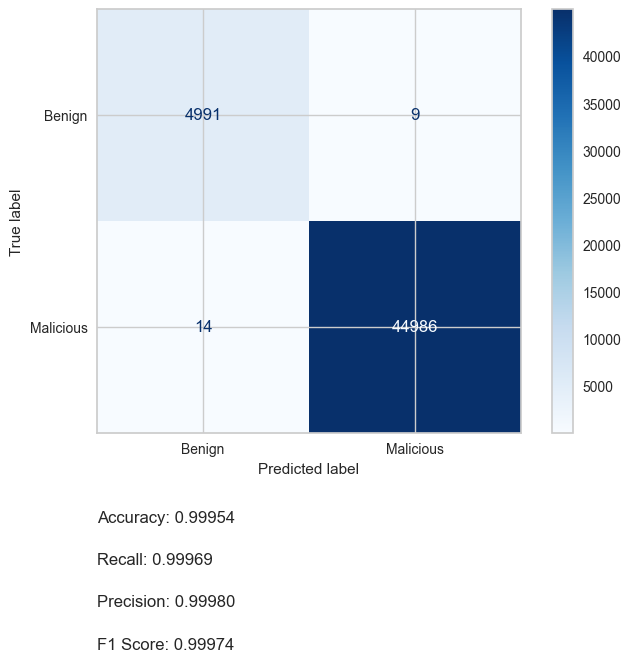

In [69]:
y_pred = choosen14.predict(X_test_3) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_3, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_3, y_pred)
recall = recall_score(y_test_3, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_3, y_pred, pos_label=1)
f1 = f1_score(y_test_3, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Light Gradient Boosting*

In [70]:
choosen15 = LGBMClassifier(**{'verbosity' : -1},  random_state = 42) 

choosen15.fit(X_train_3, y_train_3) 

choosen15.score(X_train_3, y_train_3)

0.999915

In [71]:
choosen15.score(X_test_3, y_test_3) #get the test score of the model

0.99952

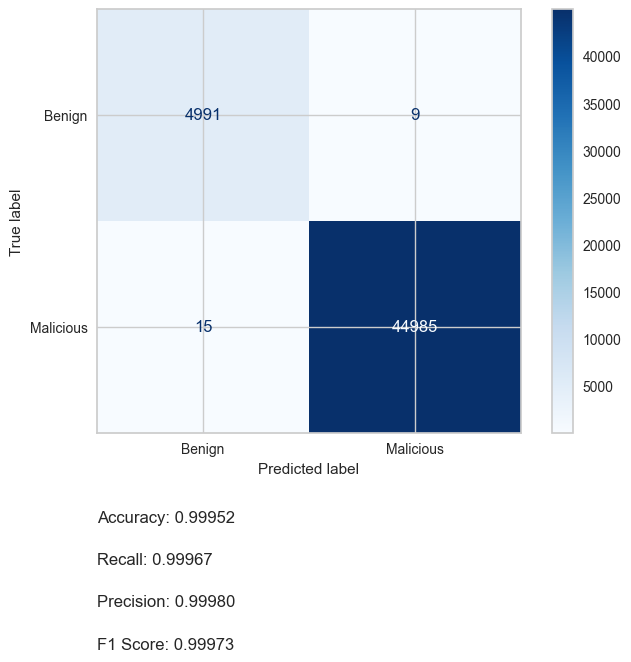

In [72]:
y_pred = choosen15.predict(X_test_3) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_3, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_3, y_pred)
recall = recall_score(y_test_3, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_3, y_pred, pos_label=1)
f1 = f1_score(y_test_3, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*AdaBoost*

In [73]:
choosen16 = AdaBoostClassifier(random_state=42)

choosen16.fit(X_train_3, y_train_3)

choosen16.score(X_train_3, y_train_3)

0.99928

In [74]:
choosen16.score(X_test_3, y_test_3) #get the test score of the model

0.99906

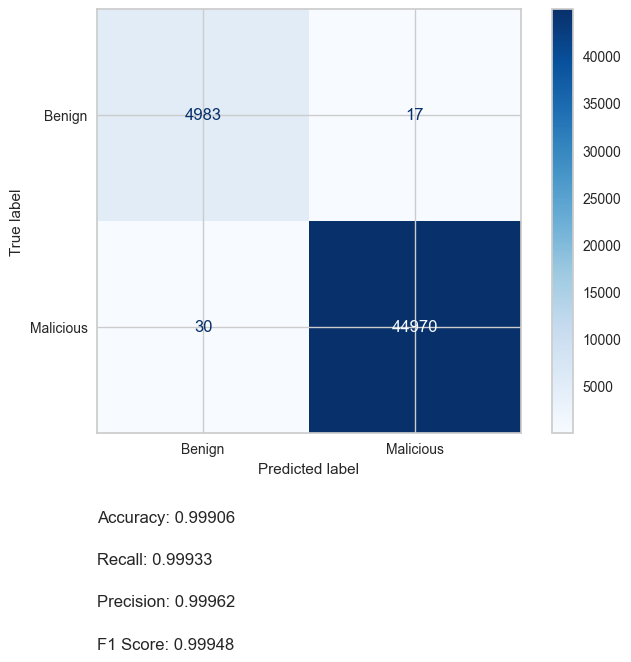

In [75]:
y_pred = choosen16.predict(X_test_3) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_3, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_3, y_pred)
recall = recall_score(y_test_3, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_3, y_pred, pos_label=1)
f1 = f1_score(y_test_3, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

*Extra Trees Classifier*

In [76]:
choosen17 = ExtraTreesClassifier(random_state=42)

choosen17.fit(X_train_3, y_train_3)

choosen17.score(X_train_3, y_train_3)

1.0

In [77]:
choosen17.score(X_test_3, y_test_3) #get the test score of the model    

0.99946

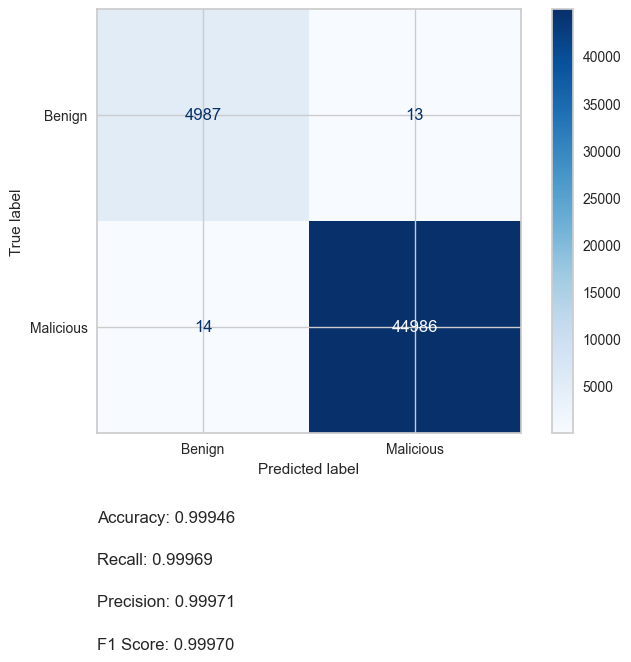

In [78]:
y_pred = choosen17.predict(X_test_3) # Predict the test data

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_3, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
disp.plot(cmap=plt.cm.Blues)

# Calculate additional metrics
accuracy = accuracy_score(y_test_3, y_pred)
recall = recall_score(y_test_3, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
precision = precision_score(y_test_3, y_pred, pos_label=1)
f1 = f1_score(y_test_3, y_pred, pos_label=1)

# Add text annotations for the metrics
plt.gca().text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=plt.gca().transAxes)
plt.gca().text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()

**Algorithm Comparison between different train and test size datasets**


In this final part we are going to compare the results of the models trained with different sizes of datasets.

*XGBoost algorithm*

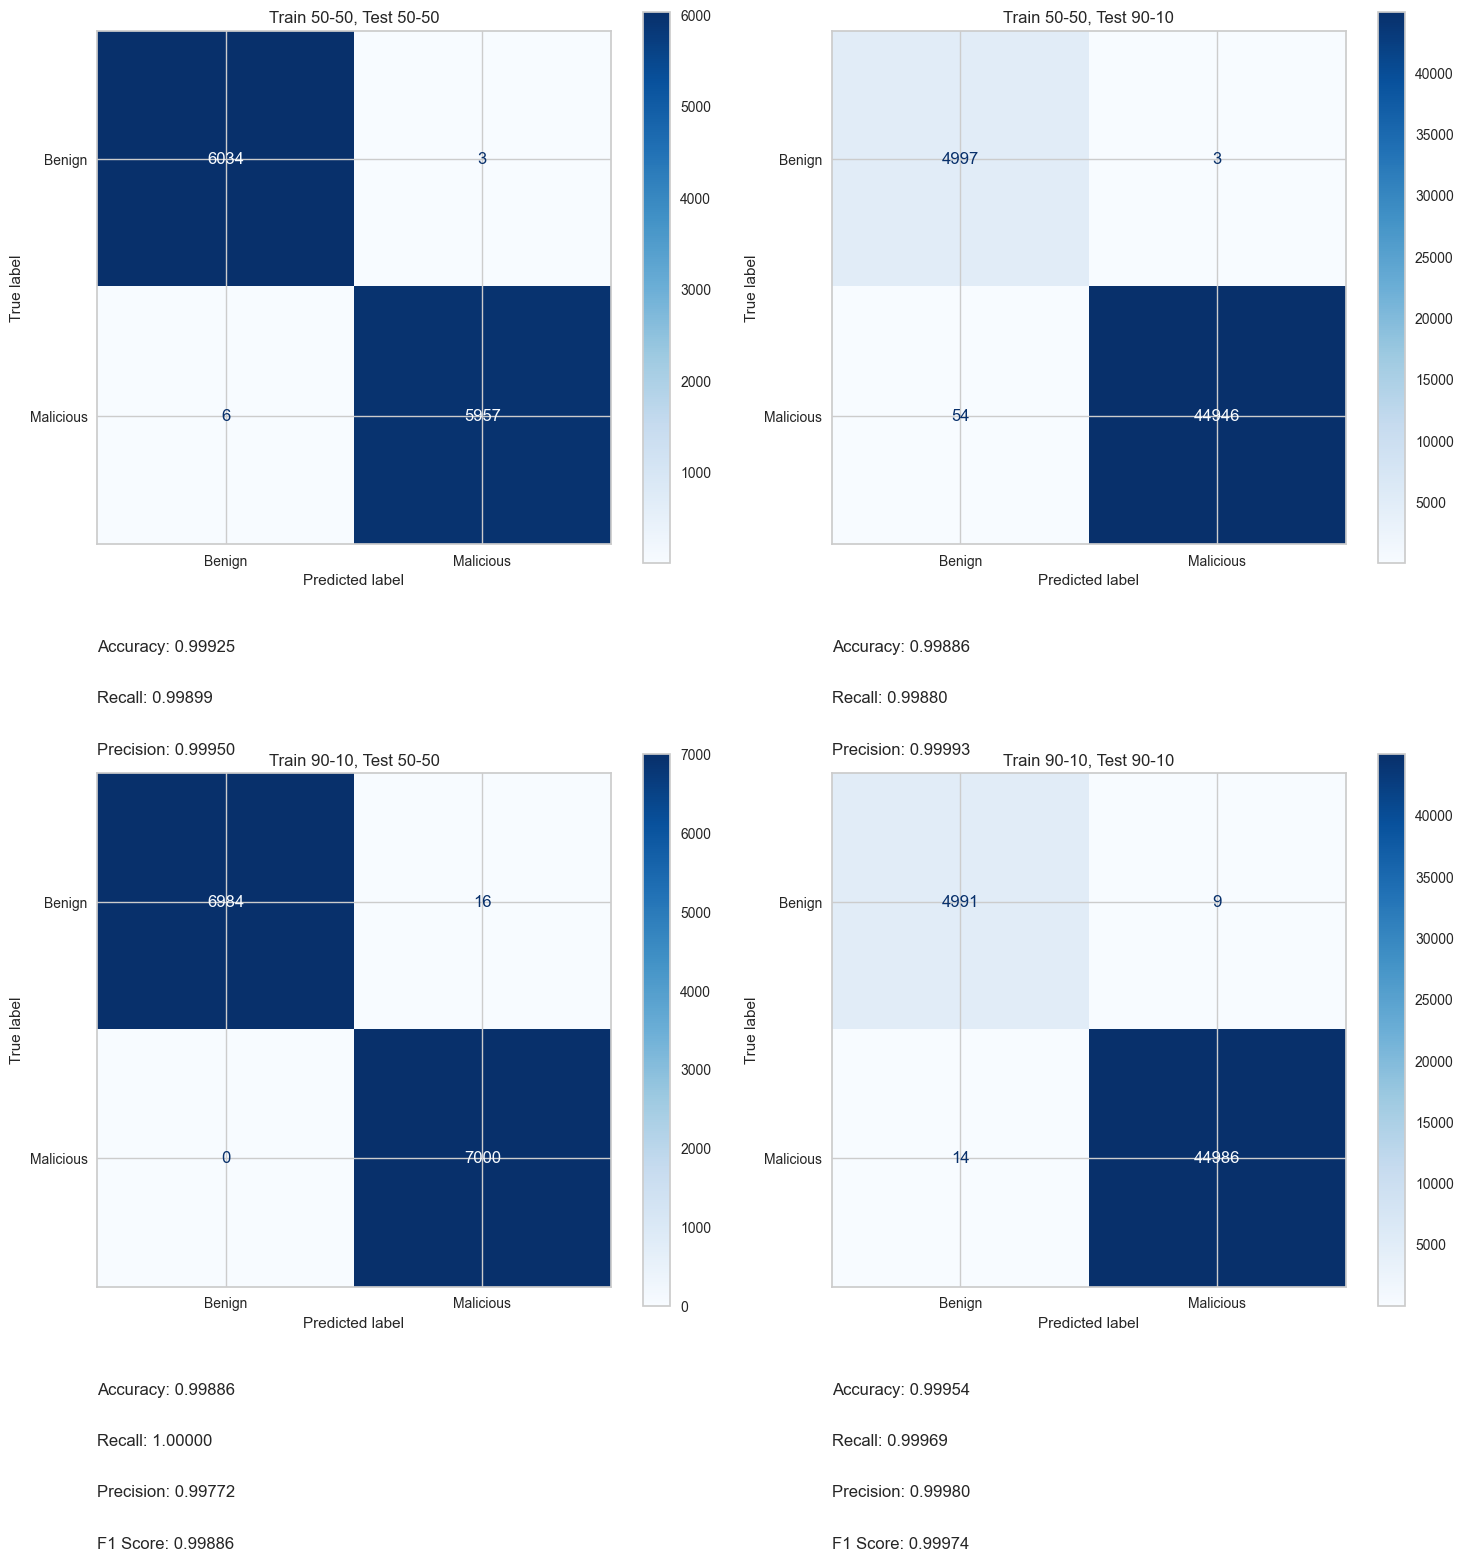

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# List of models and corresponding test sets
models = [(choosen, X_test_0, y_test_0, axes[0, 0], 'Model choosen6', 'Train 50-50, Test 50-50'),
          (choosen6, X_test_1, y_test_1, axes[0, 1], 'Model choosen60', 'Train 50-50, Test 90-10'),
          (choosen10, X_test_2, y_test_2, axes[1, 0], 'Model choosen10', 'Train 90-10, Test 50-50'),
          (choosen14, X_test_3, y_test_3, axes[1, 1], 'Model choosen14', 'Train 90-10, Test 90-10')]

for model, X_test, y_test, ax, title, plot_label in models:
    # Predict the test data
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(plot_label)

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Add text annotations for the metrics
    ax.text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=ax.transAxes)


# Adjust layout to make room for the metrics
plt.tight_layout()

# Show the plot
plt.show()

**Results Comparison**

We can see that all of the results were very similar and close, with accuracy around 0.999, and all the other values, being really close to each other as well.


*Light gradient Boosting Algorithm*

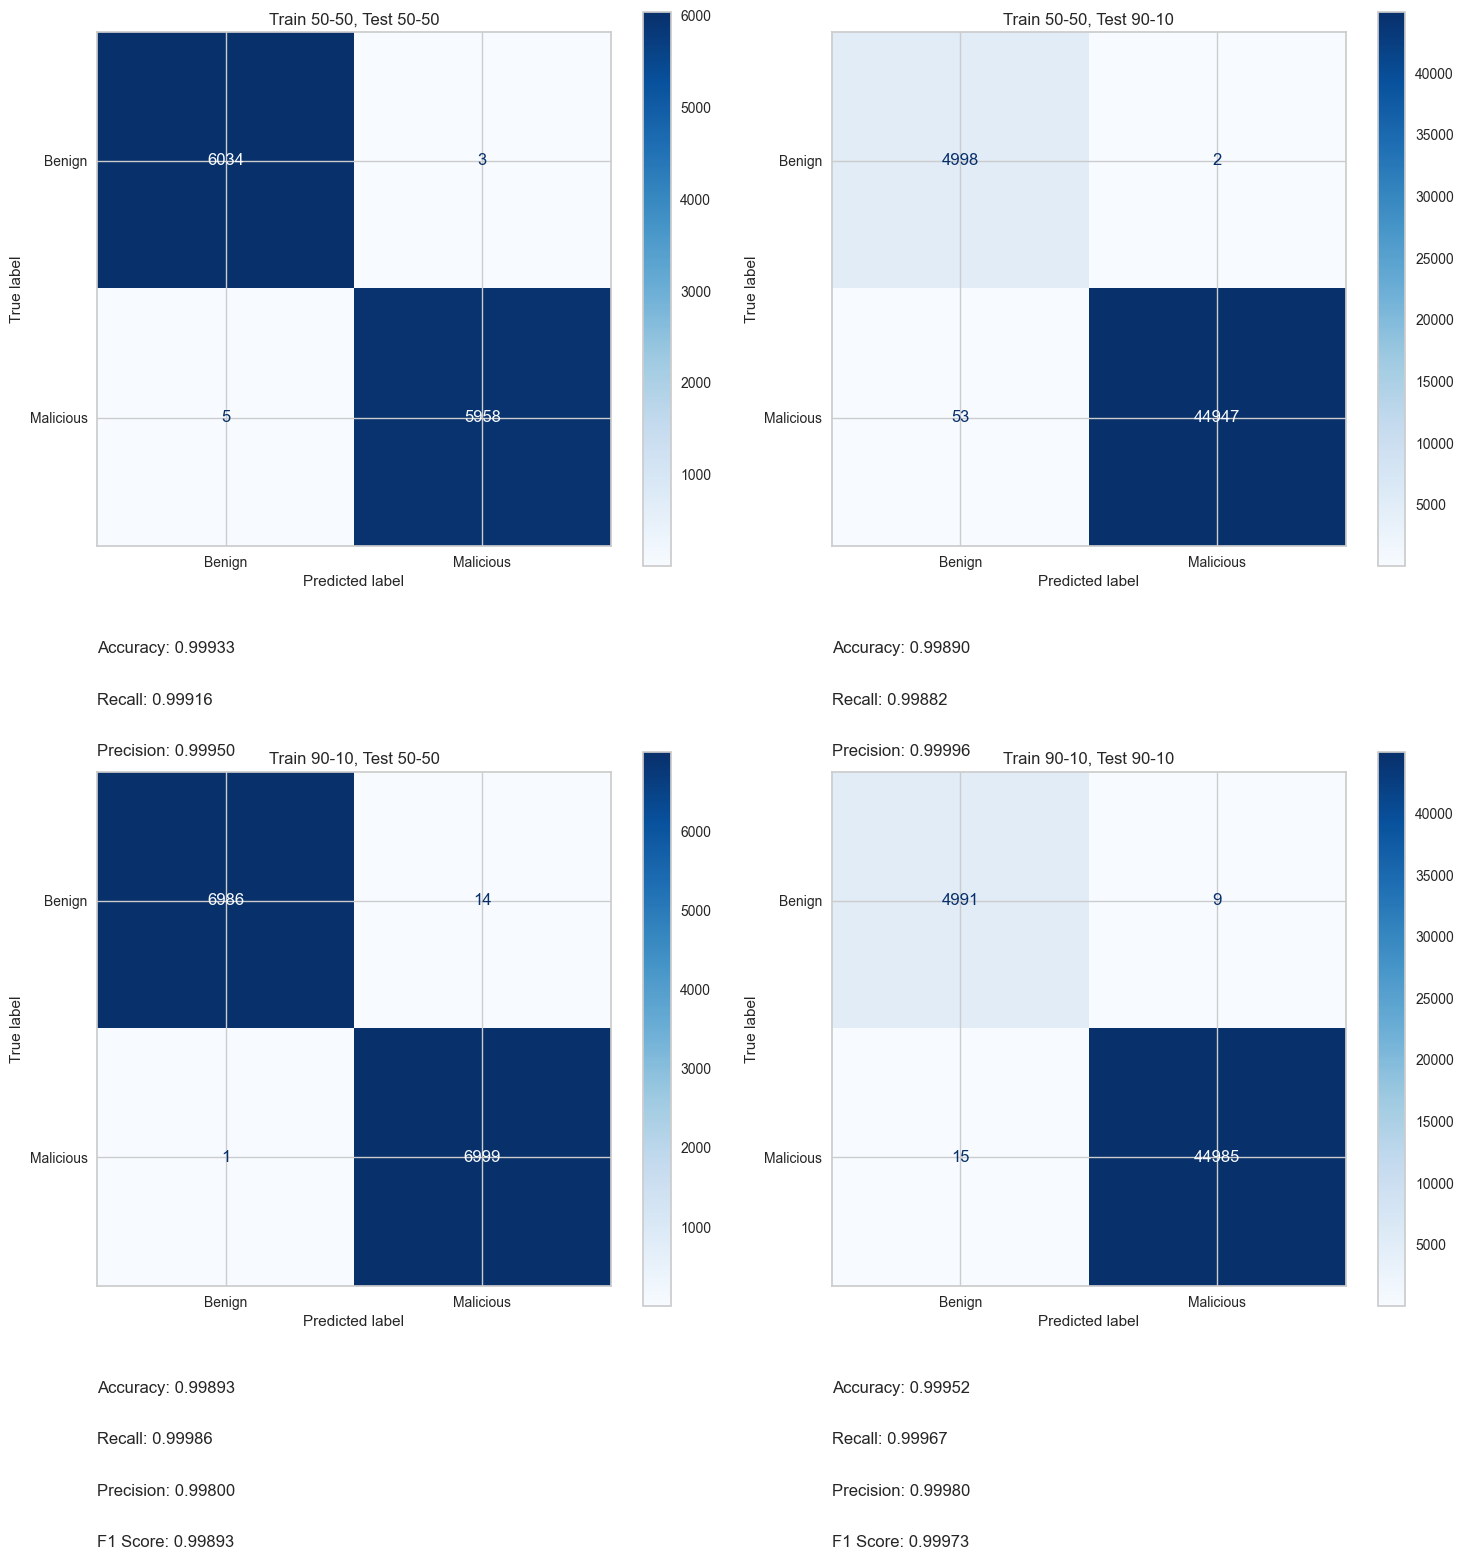

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# List of models and corresponding test sets
models = [(choosen2, X_test_0, y_test_0, axes[0, 0], 'Model choosen6', 'Train 50-50, Test 50-50'),
          (choosen7, X_test_1, y_test_1, axes[0, 1], 'Model choosen60', 'Train 50-50, Test 90-10'),
          (choosen11, X_test_2, y_test_2, axes[1, 0], 'Model choosen10', 'Train 90-10, Test 50-50'),
          (choosen15, X_test_3, y_test_3, axes[1, 1], 'Model choosen14', 'Train 90-10, Test 90-10')]

for model, X_test, y_test, ax, title, plot_label in models:
    # Predict the test data
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(plot_label)

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Add text annotations for the metrics
    ax.text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=ax.transAxes)


# Adjust layout to make room for the metrics
plt.tight_layout()

# Show the plot
plt.show()

**Results Comparison**

The results were also very similar, with accuracy around 0.999, and all the other values being really close to each other as well.

*AdaBoost algorithm*

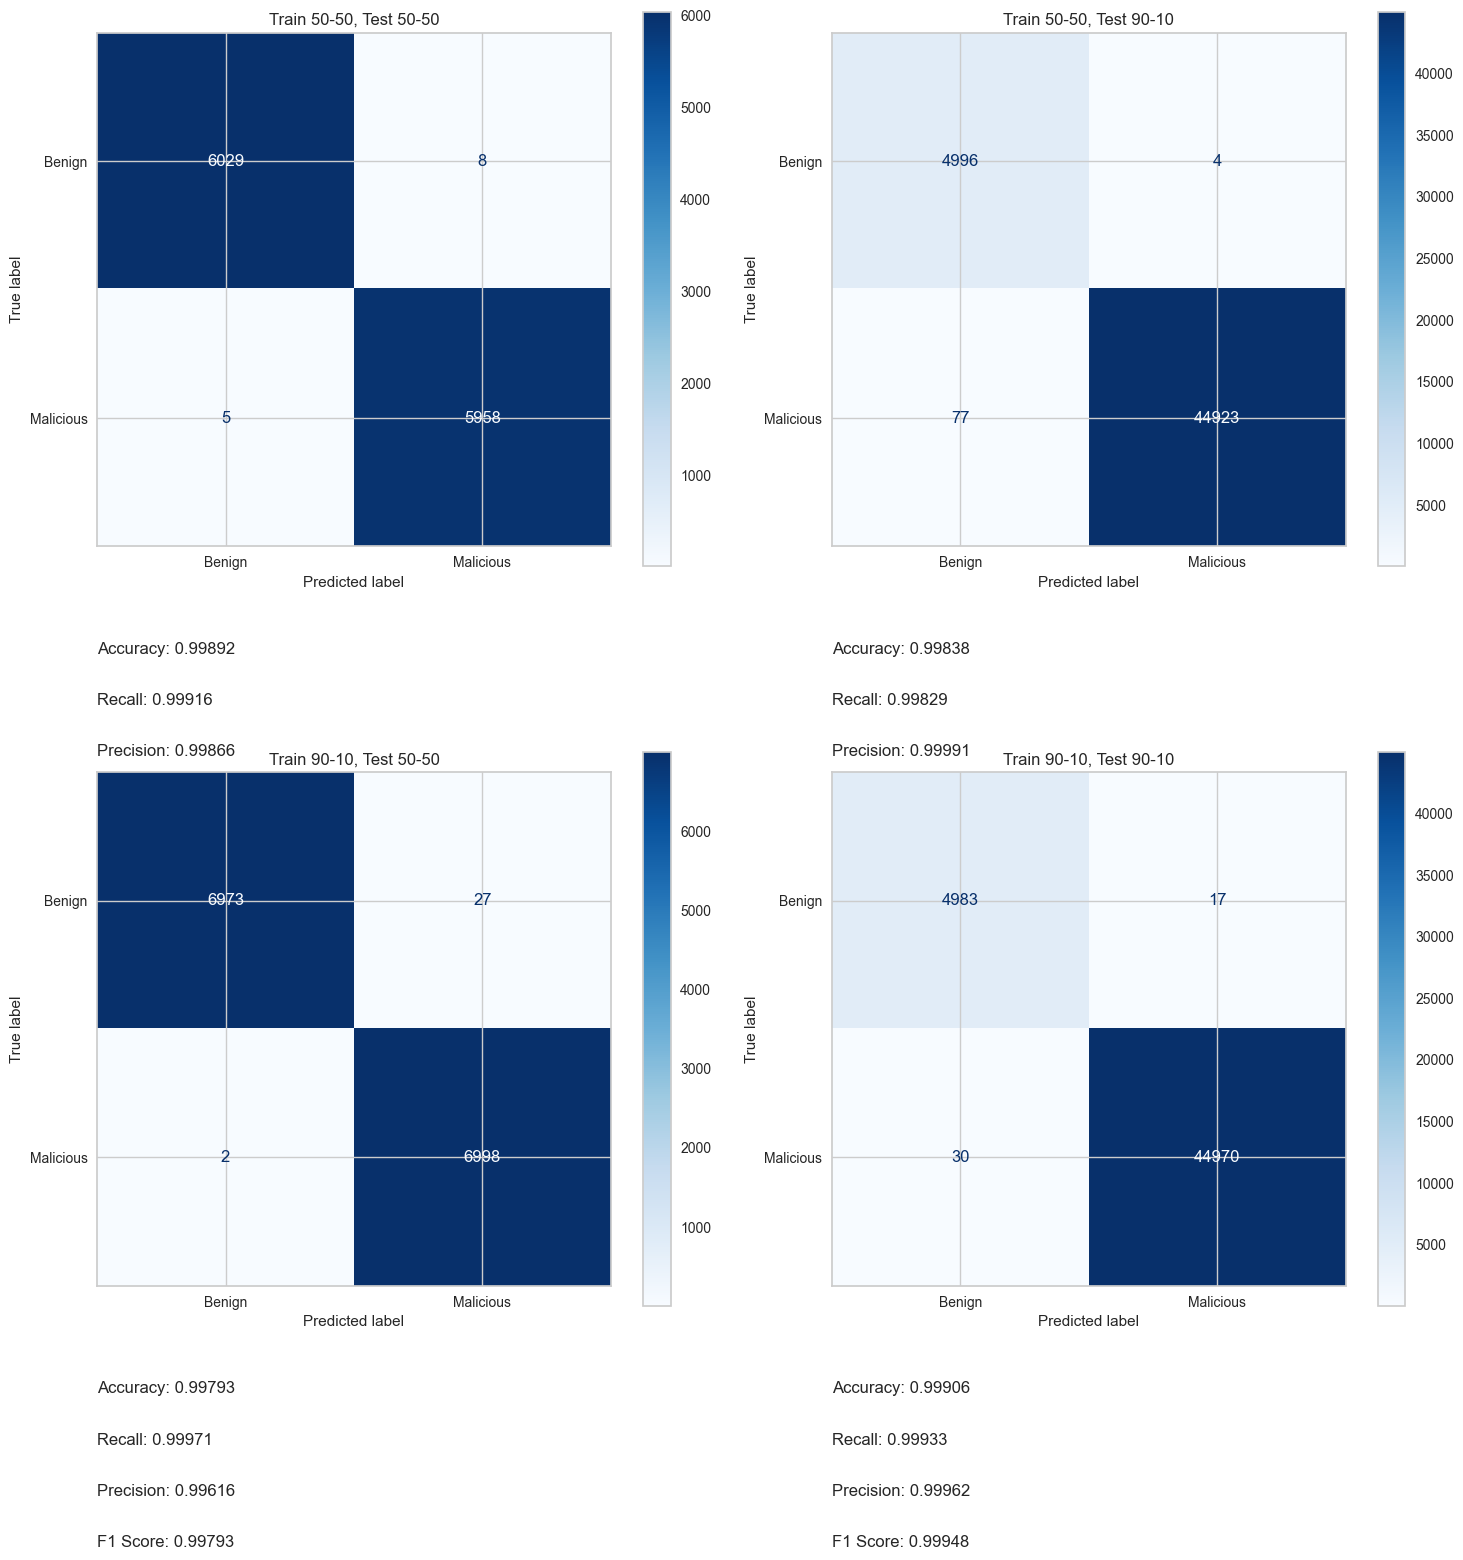

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# List of models and corresponding test sets
models = [(choosen3, X_test_0, y_test_0, axes[0, 0], 'Model choosen6', 'Train 50-50, Test 50-50'),
          (choosen8, X_test_1, y_test_1, axes[0, 1], 'Model choosen60', 'Train 50-50, Test 90-10'),
          (choosen12, X_test_2, y_test_2, axes[1, 0], 'Model choosen10', 'Train 90-10, Test 50-50'),
          (choosen16, X_test_3, y_test_3, axes[1, 1], 'Model choosen14', 'Train 90-10, Test 90-10')]

for model, X_test, y_test, ax, title, plot_label in models:
    # Predict the test data
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(plot_label)

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Add text annotations for the metrics
    ax.text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=ax.transAxes)


# Adjust layout to make room for the metrics
plt.tight_layout()

# Show the plot
plt.show()

**Results Comparison**

The results were also very similar, with accuracy around 0.999, and all the other values being really close to each other as well.

*Extra Trees algorithm*

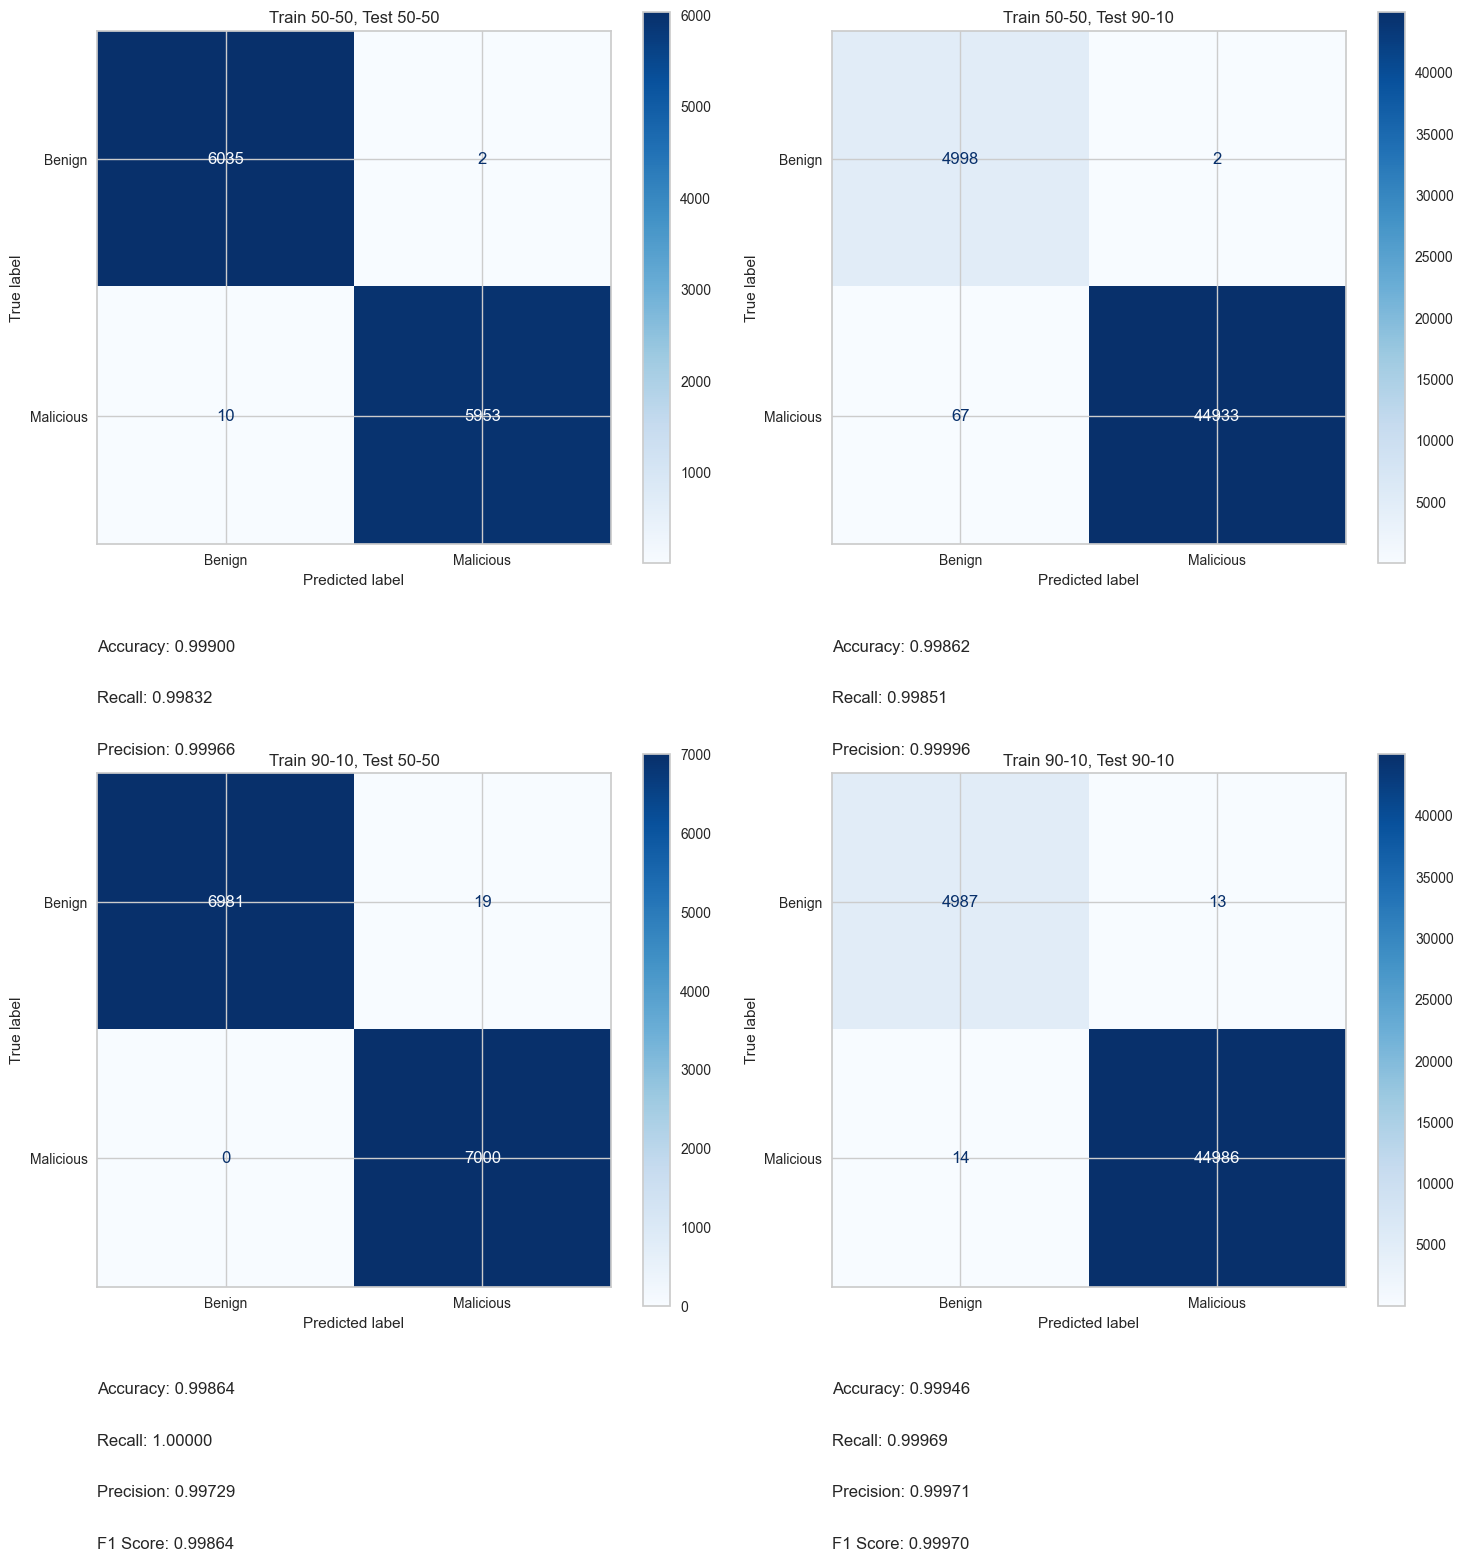

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# List of models and corresponding test sets
models = [(choosen4, X_test_0, y_test_0, axes[0, 0], 'Model choosen6', 'Train 50-50, Test 50-50'),
          (choosen9, X_test_1, y_test_1, axes[0, 1], 'Model choosen60', 'Train 50-50, Test 90-10'),
          (choosen13, X_test_2, y_test_2, axes[1, 0], 'Model choosen10', 'Train 90-10, Test 50-50'),
          (choosen17, X_test_3, y_test_3, axes[1, 1], 'Model choosen14', 'Train 90-10, Test 90-10')]

for model, X_test, y_test, ax, title, plot_label in models:
    # Predict the test data
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Benign", "Malicious"])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(plot_label)

    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the label for the positive class
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Add text annotations for the metrics
    ax.text(0, -0.2, f'Accuracy: {accuracy:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.3, f'Recall: {recall:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.4, f'Precision: {precision:.5f}', ha='left', va='center', transform=ax.transAxes)
    ax.text(0, -0.5, f'F1 Score: {f1:.5f}', ha='left', va='center', transform=ax.transAxes)


# Adjust layout to make room for the metrics
plt.tight_layout()

# Show the plot
plt.show()

**Results Comparison**

The results were also very similar, with accuracy around 0.999, and all the other values being really close to each other as well.

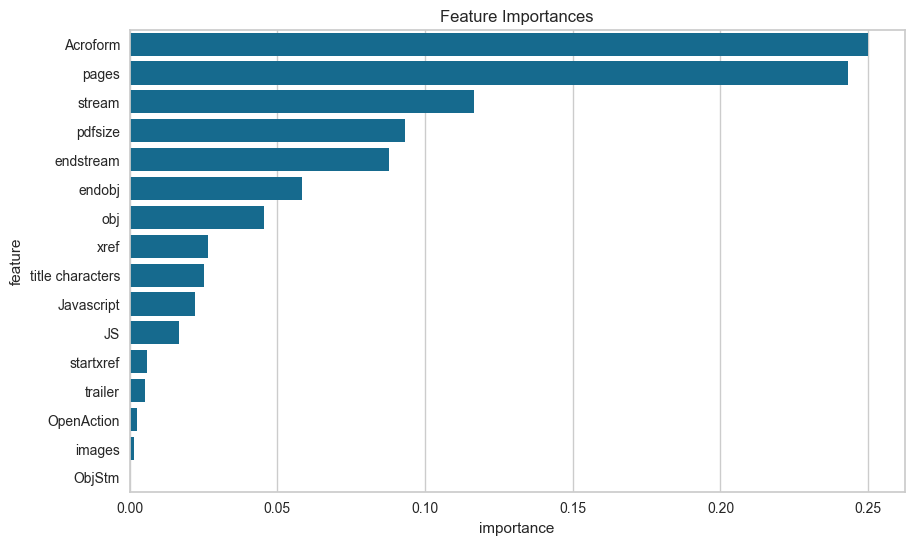

In [26]:
rf = RandomForestClassifier(n_estimators= 100, random_state=42)

rf.fit(X_train_2, y_train_2)

importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'feature': X_train_2.columns,
    'importance': importances
})

importance_df = importance_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Feature Importances")
plt.show


----------------------------------------------------------------------------------------------------------------------------------

**Conclusions**

As a conclusion, we were able to build a model to predict if a PDF contains some type of unwanted content. We were able to achieve a good accuracy, and the model was able to predict the malicious PDFs with a good precision.

The algorithms that presented the best results were Extreme Gradient Boosting, Light Gradient Boosting, AdaBoost and Extra Trees.

In each algorithm when we compared the results of the different approach when can see that the results are very similar. 

We can conclude that cleaning the outsiders is not necessary, as the results are very similar.

Comparing the results when we give different percentages of benign and malign PDFs to train and test the model, even though the results are very similar, given the conclusions we want to take from this project, we assume that the most appropriate distribution is to give a train set with 90% benign and 10% malign PDFs and a test set with 50% benign and 50% malign PDFs.

This is the distribution where the most False Positives happen, because we consider to be best to say a given PDF is malign and it is not, than to say it is benign and it is not.

When we trained with 50-50 and tested with 90-10 we can see the opposite condition, where the most False Negatives happens. In this case the algorithms consider that the PDF is benign when it is malign. We consider this situation dangerous because it gives a feeling of not danger when there is. 

Finally, it is visible that our results were considerably good, with accuracies around 0.99 in every model and approach.
This results can be explained with the amount of data that we had, making it possible to train the model with large and significant data, so that the model could really understand the difference between the data.

Besides, as we can see from our Feature Importance graph, two columns jump out, the "Acroform" and "pages". Connecting this information with our correlation matrix, we can see that the pages has a high positive correlation, while the Acroform has a high negative correlation. This means that the number of pages is a good predicator for a pdf to be malicious, while the Acroform is a good predicator for a pdf to be benign.

***Authors***

| Name | Email |
| --- | --- |
| Gonçalo Costa | up202103336@up.pt|
| João Correia | up202005015@up.pt|
| Ricardo Vieira | up202005091@up.pt|